<a href="https://colab.research.google.com/github/ynlare/BIRTH/blob/main/Soccerstat.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

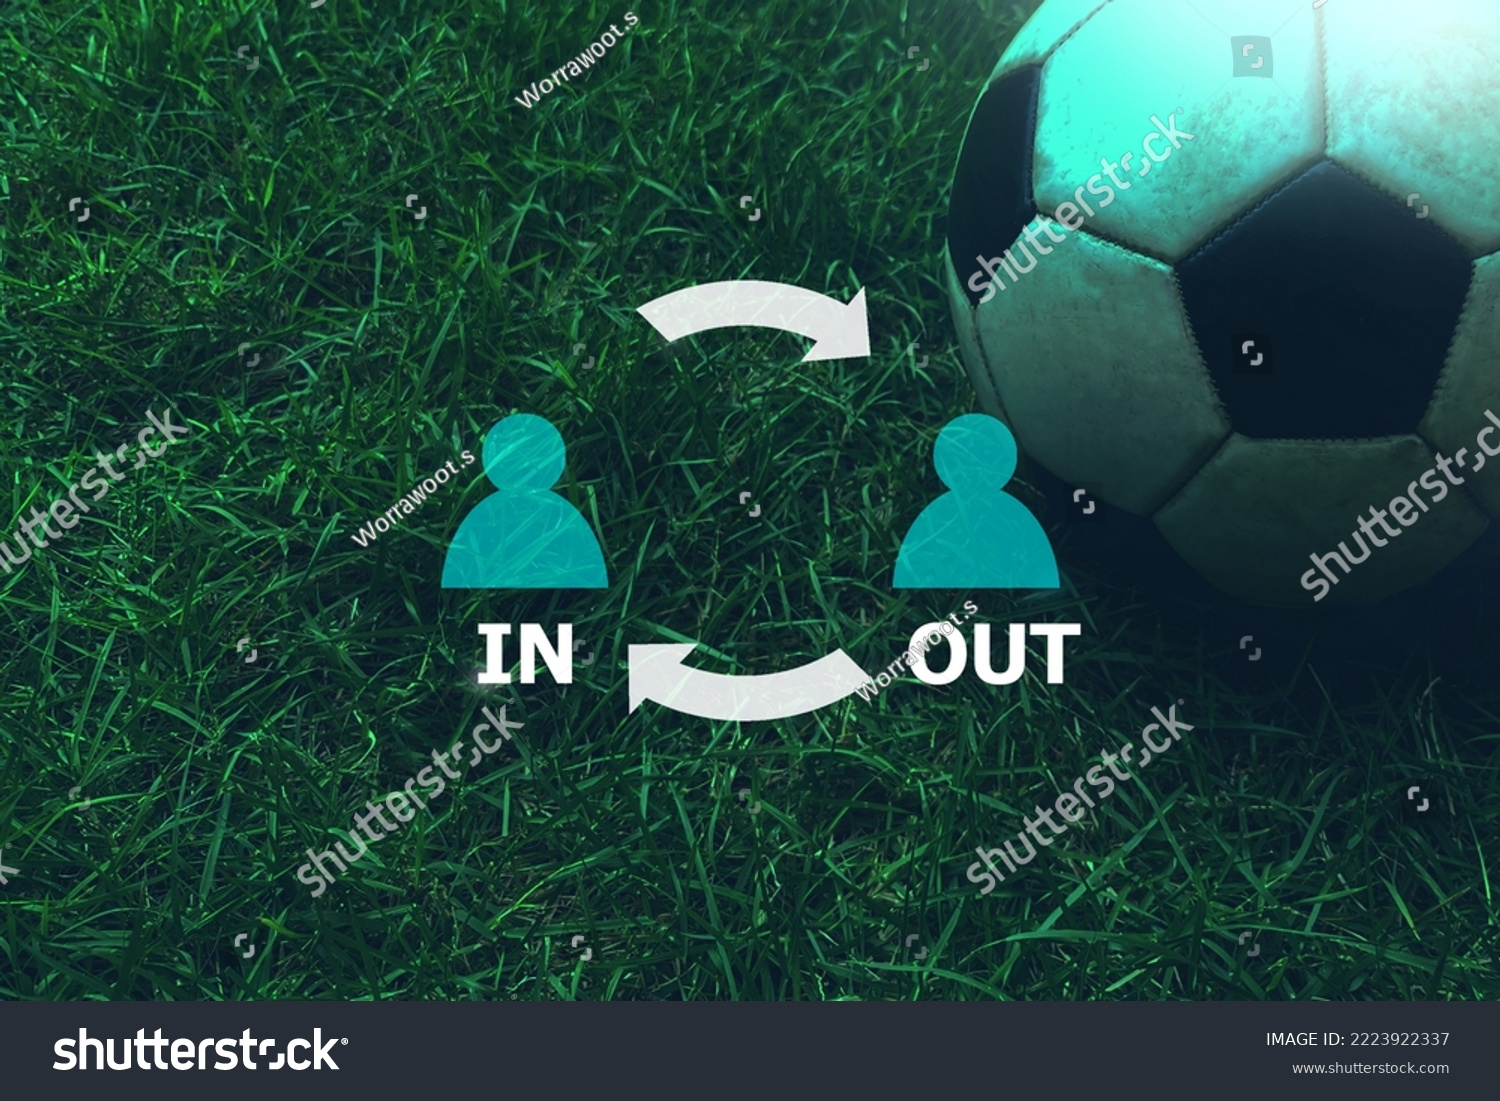

In [590]:
from IPython import display
display.Image("/content/drive/MyDrive/Colab Notebooks/Copy of soccer.jpg", width = 1800, height = 600)

https://www.progressivesoccertraining.com/what-age-is-too-old-to-play-soccer/

# What Age Is Too Old To Play Soccer?
***Question from player:***

“At what age does a soccer player start being considered old?”

How old is too old to go pro in soccer?

What age do soccer players usually retire?

What age is too late to start playing soccer?

What age is too late to play soccer in general?

***To answer this question***, I visited "sofifa.com," a site that publishes the ages of professional footballers. Using its API, I extracted the data and integrated it into Google Sheets. I then used the Python programming language for data cleaning and preprocessing. After preprocessing, I analyzed the data using statistical methods and applied machine learning to determine if a player is likely to secure a contract based on certain characteristics.

**Pandas for Data Cleaning and Preprocessing**

---



---



In [591]:
!pip install Altair_viewer
from ast import Import
import pandas as pd
import gspread as gs
import matplotlib.pyplot as plt
import csv
import xml
import html
import numpy as np
import seaborn as sns
import plotly.express as px
from scipy.stats import zscore
from scipy.stats import chi2_contingency
import altair as alt
from IPython.display import display

In [592]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [593]:
df = pd.read_excel("/content/drive/MyDrive/Data_Engineering/Soccerplayerstat.xlsx")

In [594]:
df.head(2)


,Unnamed: 0,Name,Age,Overall rating,Potential,Team & Contract,Value,Wage,Total stats
0,NaN,Vitor Roque\nSTRWLW,18,*76*,*88*,FC Barcelona\n2024 ~ 2031,€17.5M,€44K,*1829*
1,NaN,T. Buchanan\nRBRMLM,24,*72*,*77*,Inter\n2024 ~ 2025,€3.3M,€34K,*1931*


In [595]:
# Drop the "Unnamed: 0" column
df = df.drop("Unnamed: 0", axis=1)


In [596]:
df.head(2)

,Name,Age,Overall rating,Potential,Team & Contract,Value,Wage,Total stats
0,Vitor Roque\nSTRWLW,18,*76*,*88*,FC Barcelona\n2024 ~ 2031,€17.5M,€44K,*1829*
1,T. Buchanan\nRBRMLM,24,*72*,*77*,Inter\n2024 ~ 2025,€3.3M,€34K,*1931*


In [597]:
# Remove newline characters from both 'Name' and 'Team & Contract' columns
df[['Name', 'Team & Contract']] = df[['Name', 'Team & Contract']].replace('\n', ' ', regex=True)

In [598]:
df.head(2)

,Name,Age,Overall rating,Potential,Team & Contract,Value,Wage,Total stats
0,Vitor Roque STRWLW,18,*76*,*88*,FC Barcelona 2024 ~ 2031,€17.5M,€44K,*1829*
1,T. Buchanan RBRMLM,24,*72*,*77*,Inter 2024 ~ 2025,€3.3M,€34K,*1931*


In [599]:
# Select rows where 'Team & Contract' column contains "~"
selectedrowscontaintilde  = df[df['Team & Contract'].str.contains('~')]
selectedrowscontaintilde.head(2)

,Name,Age,Overall rating,Potential,Team & Contract,Value,Wage,Total stats
0,Vitor Roque STRWLW,18,*76*,*88*,FC Barcelona 2024 ~ 2031,€17.5M,€44K,*1829*
1,T. Buchanan RBRMLM,24,*72*,*77*,Inter 2024 ~ 2025,€3.3M,€34K,*1931*


In [600]:
# Extract 'Team' and 'Contract' based on the last 12 characters
selectedrowscontaintilde[['Team', 'Contract']] = selectedrowscontaintilde['Team & Contract'].str.extract(r'(.+) (\d{4} ~ \d{4})$')

<ipython-input-600-97f155d010f5>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selectedrowscontaintilde[['Team', 'Contract']] = selectedrowscontaintilde['Team & Contract'].str.extract(r'(.+) (\d{4} ~ \d{4})$')
<ipython-input-600-97f155d010f5>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selectedrowscontaintilde[['Team', 'Contract']] = selectedrowscontaintilde['Team & Contract'].str.extract(r'(.+) (\d{4} ~ \d{4})$')


In [601]:
selectedrowscontaintilde.head(2)

,Name,Age,Overall rating,Potential,Team & Contract,Value,Wage,Total stats,Team,Contract
0,Vitor Roque STRWLW,18,*76*,*88*,FC Barcelona 2024 ~ 2031,€17.5M,€44K,*1829*,FC Barcelona,2024 ~ 2031
1,T. Buchanan RBRMLM,24,*72*,*77*,Inter 2024 ~ 2025,€3.3M,€34K,*1931*,Inter,2024 ~ 2025


In [602]:
# Split 'Contract' into 'ContractStart' and 'ContractEnd' based on "~"
selectedrowscontaintilde[['ContractStart', 'ContractEnd']] = selectedrowscontaintilde['Contract'].str.split(' ~ ', expand=True)

<ipython-input-602-b04ef4f4d206>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selectedrowscontaintilde[['ContractStart', 'ContractEnd']] = selectedrowscontaintilde['Contract'].str.split(' ~ ', expand=True)
<ipython-input-602-b04ef4f4d206>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selectedrowscontaintilde[['ContractStart', 'ContractEnd']] = selectedrowscontaintilde['Contract'].str.split(' ~ ', expand=True)


In [603]:
selectedrowscontaintilde.head(2)

,Name,Age,Overall rating,Potential,Team & Contract,Value,Wage,Total stats,Team,Contract,ContractStart,ContractEnd
0,Vitor Roque STRWLW,18,*76*,*88*,FC Barcelona 2024 ~ 2031,€17.5M,€44K,*1829*,FC Barcelona,2024 ~ 2031,2024,2031
1,T. Buchanan RBRMLM,24,*72*,*77*,Inter 2024 ~ 2025,€3.3M,€34K,*1931*,Inter,2024 ~ 2025,2024,2025


In [604]:
selectedrowscontaintildecopy = selectedrowscontaintilde.copy()

In [605]:
selectedrowscontaintildecopy['ContractStart'] = '01/01/' + selectedrowscontaintildecopy['ContractStart']
selectedrowscontaintildecopy['ContractEnd'] = '12/31/' + selectedrowscontaintildecopy['ContractEnd']

In [606]:
selectedrowscontaintildecopy.head(2)

,Name,Age,Overall rating,Potential,Team & Contract,Value,Wage,Total stats,Team,Contract,ContractStart,ContractEnd
0,Vitor Roque STRWLW,18,*76*,*88*,FC Barcelona 2024 ~ 2031,€17.5M,€44K,*1829*,FC Barcelona,2024 ~ 2031,01/01/2024,12/31/2031
1,T. Buchanan RBRMLM,24,*72*,*77*,Inter 2024 ~ 2025,€3.3M,€34K,*1931*,Inter,2024 ~ 2025,01/01/2024,12/31/2025


In [607]:
# Remove "*" from 'Overall rating', 'Potential', and 'Total stats'
columns_to_clean = ['Age','Overall rating', 'Potential', 'Total stats']
selectedrowscontaintildecopy[columns_to_clean] = selectedrowscontaintildecopy[columns_to_clean].replace('\*', '', regex=True)

# Convert columns to numeric
selectedrowscontaintildecopy[columns_to_clean] = selectedrowscontaintildecopy[columns_to_clean].apply(pd.to_numeric, errors='coerce')

In [608]:
selectedrowscontaintildecopy.head(2)

,Name,Age,Overall rating,Potential,Team & Contract,Value,Wage,Total stats,Team,Contract,ContractStart,ContractEnd
0,Vitor Roque STRWLW,18,76.0,88.0,FC Barcelona 2024 ~ 2031,€17.5M,€44K,1829,FC Barcelona,2024 ~ 2031,01/01/2024,12/31/2031
1,T. Buchanan RBRMLM,24,72.0,77.0,Inter 2024 ~ 2025,€3.3M,€34K,1931,Inter,2024 ~ 2025,01/01/2024,12/31/2025


In [609]:
# Split 'Contract' into 'ContractStart' and 'ContractEnd' based on "~"
selectedrowscontaintilde[['ContractStart', 'ContractEnd']] = selectedrowscontaintilde['Team & Contract'].str.split(' ~ ', expand=True)

# Function to convert currency values
def convert_currency(value):
    if isinstance(value, str):
        if 'M' in value:
            return float(value.replace('€', '').replace('M', '')) * 1e6
        elif 'K' in value:
            return float(value.replace('€', '').replace('K', '')) * 1e3
        else:
            return float(value.replace('€', ''))
    else:
        return float(value)

# Apply the conversion function to 'Value' and 'Wage' columns
selectedrowscontaintildecopy['Value'] = selectedrowscontaintildecopy['Value'].apply(convert_currency)

# Convert 'Wage' only if it's not an integer
selectedrowscontaintildecopy['Wage'] = selectedrowscontaintildecopy['Wage'].apply(lambda x: convert_currency(x) if isinstance(x, str) else x)

<ipython-input-609-629256c4ceff>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selectedrowscontaintilde[['ContractStart', 'ContractEnd']] = selectedrowscontaintilde['Team & Contract'].str.split(' ~ ', expand=True)


In [610]:

#selectedrowscontaintildecopy

In [611]:
selectedrowscontaintildecopy['ContractStart'] = pd.to_datetime(selectedrowscontaintildecopy['ContractStart'], format='%m/%d/%Y')
selectedrowscontaintildecopy['ContractEnd'] = pd.to_datetime(selectedrowscontaintildecopy['ContractEnd'], format='%m/%d/%Y')

In [612]:
selectedrowscontaintildecopy.head(2)

,Name,Age,Overall rating,Potential,Team & Contract,Value,Wage,Total stats,Team,Contract,ContractStart,ContractEnd
0,Vitor Roque STRWLW,18,76.0,88.0,FC Barcelona 2024 ~ 2031,17500000.0,44000.0,1829,FC Barcelona,2024 ~ 2031,2024-01-01,2031-12-31
1,T. Buchanan RBRMLM,24,72.0,77.0,Inter 2024 ~ 2025,3300000.0,34000.0,1931,Inter,2024 ~ 2025,2024-01-01,2025-12-31


In [613]:
# Calculate the total contract years
selectedrowscontaintildecopy['TotalContractYears'] = (selectedrowscontaintildecopy['ContractEnd'] - selectedrowscontaintildecopy['ContractStart']).dt.days / 365

# Round the values to two decimal places
selectedrowscontaintildecopy['TotalContractYears'] = selectedrowscontaintildecopy['TotalContractYears'].round(0)

selectedrowscontaintildecopy.head(2)


,Name,Age,Overall rating,Potential,Team & Contract,Value,Wage,Total stats,Team,Contract,ContractStart,ContractEnd,TotalContractYears
0,Vitor Roque STRWLW,18,76.0,88.0,FC Barcelona 2024 ~ 2031,17500000.0,44000.0,1829,FC Barcelona,2024 ~ 2031,2024-01-01,2031-12-31,8.0
1,T. Buchanan RBRMLM,24,72.0,77.0,Inter 2024 ~ 2025,3300000.0,34000.0,1931,Inter,2024 ~ 2025,2024-01-01,2025-12-31,2.0


In [614]:
selectedrowscontaintildecopy['ContractType'] = selectedrowscontaintildecopy['Team & Contract'].apply(
    lambda x: 'Free' if 'Free' in x else ('Loan' if 'On loan' in x else 'Contract' if '~' in x else 'No Contract')
)

selectedrowscontaintildecopy.head(2)

,Name,Age,Overall rating,Potential,Team & Contract,Value,Wage,Total stats,Team,Contract,ContractStart,ContractEnd,TotalContractYears,ContractType
0,Vitor Roque STRWLW,18,76.0,88.0,FC Barcelona 2024 ~ 2031,17500000.0,44000.0,1829,FC Barcelona,2024 ~ 2031,2024-01-01,2031-12-31,8.0,Contract
1,T. Buchanan RBRMLM,24,72.0,77.0,Inter 2024 ~ 2025,3300000.0,34000.0,1931,Inter,2024 ~ 2025,2024-01-01,2025-12-31,2.0,Contract


In [615]:
n = 11  # Number of characters to remove
selectedrowscontaintildecopy['Team'] = selectedrowscontaintildecopy['Team & Contract'].apply(lambda x: x[:-n] if len(x) > n else '')
selectedrowscontaintildecopy.head(2)

,Name,Age,Overall rating,Potential,Team & Contract,Value,Wage,Total stats,Team,Contract,ContractStart,ContractEnd,TotalContractYears,ContractType
0,Vitor Roque STRWLW,18,76.0,88.0,FC Barcelona 2024 ~ 2031,17500000.0,44000.0,1829,FC Barcelona,2024 ~ 2031,2024-01-01,2031-12-31,8.0,Contract
1,T. Buchanan RBRMLM,24,72.0,77.0,Inter 2024 ~ 2025,3300000.0,34000.0,1931,Inter,2024 ~ 2025,2024-01-01,2025-12-31,2.0,Contract


In [616]:
# Drop 'Team & Contract' and 'Contract' columns from the DataFrame
selectedrowscontaintildecopy = selectedrowscontaintildecopy.drop(columns=['Team & Contract', 'Contract'])
# Verify the changes
selectedrowscontaintildecopy.head(1)


,Name,Age,Overall rating,Potential,Value,Wage,Total stats,Team,ContractStart,ContractEnd,TotalContractYears,ContractType
0,Vitor Roque STRWLW,18,76.0,88.0,17500000.0,44000.0,1829,FC Barcelona,2024-01-01,2031-12-31,8.0,Contract


In [617]:
# Identify the index of the 'ContractEnd' column
contract_end_index = selectedrowscontaintildecopy.columns.get_loc('ContractEnd')

# Identify the index of the 'ContractType' column
contract_type_index = selectedrowscontaintildecopy.columns.get_loc('ContractType')

# Move 'TotalContractYears' column to the desired position
selectedrowscontaintildecopy.insert(contract_type_index, 'TotalContractYears', selectedrowscontaintildecopy.pop('TotalContractYears'))

# Verify the changes
selectedrowscontaintildecopy.head(1)


,Name,Age,Overall rating,Potential,Value,Wage,Total stats,Team,ContractStart,ContractEnd,ContractType,TotalContractYears
0,Vitor Roque STRWLW,18,76.0,88.0,17500000.0,44000.0,1829,FC Barcelona,2024-01-01,2031-12-31,Contract,8.0


In [618]:
# Select rows where 'Team & Contract' column contains "Free"
selectedrowscontainFree  = df[df['Team & Contract'].str.contains('Free')]
selectedrowscontainFree.head(2)

,Name,Age,Overall rating,Potential,Team & Contract,Value,Wage,Total stats
4,M. Ruiz CMCAMCDM,22,*75*,*82*,Mexico Free,0,0,*2013*
48,I. Reyes CBCDM,23,*74*,*81*,Mexico Free,0,0,*2061*


In [619]:
selectedrowscontainFreecopy=selectedrowscontainFree.copy()

In [620]:
selectedrowscontainFreecopy['ContractType'] = selectedrowscontainFreecopy['Team & Contract'].apply(
    lambda x: 'Free' if 'Free' in x else ('Loan' if 'On loan' in x else 'Contract' if '~' in x else 'No Contract')
)

selectedrowscontainFreecopy.head(2)

,Name,Age,Overall rating,Potential,Team & Contract,Value,Wage,Total stats,ContractType
4,M. Ruiz CMCAMCDM,22,*75*,*82*,Mexico Free,0,0,*2013*,Free
48,I. Reyes CBCDM,23,*74*,*81*,Mexico Free,0,0,*2061*,Free


In [621]:
# Remove "*" from 'Overall rating', 'Potential', and 'Total stats'
columns_to_clean = ['Age','Overall rating', 'Potential', 'Total stats']
selectedrowscontainFreecopy[columns_to_clean] = selectedrowscontainFreecopy[columns_to_clean].replace('\*', '', regex=True)
# Convert columns to numeric
selectedrowscontainFreecopy[columns_to_clean] = selectedrowscontainFreecopy[columns_to_clean].apply(pd.to_numeric, errors='coerce')
selectedrowscontainFreecopy.head(2)

,Name,Age,Overall rating,Potential,Team & Contract,Value,Wage,Total stats,ContractType
4,M. Ruiz CMCAMCDM,22,75,82,Mexico Free,0,0,2013,Free
48,I. Reyes CBCDM,23,74,81,Mexico Free,0,0,2061,Free


In [622]:
# Function to convert currency values
def convert_currency(value):
    if isinstance(value, str):
        if 'M' in value:
            return float(value.replace('€', '').replace('M', '')) * 1e6
        elif 'K' in value:
            return float(value.replace('€', '').replace('K', '')) * 1e3
        else:
            return float(value.replace('€', ''))
    else:
        return float(value)

# Apply the conversion function to 'Value' and 'Wage' columns
selectedrowscontainFreecopy['Value'] = selectedrowscontainFreecopy['Value'].apply(convert_currency)

# Convert 'Wage' only if it's not an integer
selectedrowscontainFreecopy['Wage'] = selectedrowscontainFreecopy['Wage'].apply(lambda x: convert_currency(x) if isinstance(x, str) else x)
selectedrowscontainFreecopy.head(2)

,Name,Age,Overall rating,Potential,Team & Contract,Value,Wage,Total stats,ContractType
4,M. Ruiz CMCAMCDM,22,75,82,Mexico Free,0.0,0,2013,Free
48,I. Reyes CBCDM,23,74,81,Mexico Free,0.0,0,2061,Free


In [623]:
selectedrowscontainFreecopy['ContractStart'] = ''
selectedrowscontainFreecopy['ContractEnd'] = ''
selectedrowscontainFreecopy['TotalContractYears'] = ''
selectedrowscontainFreecopy.head(2)

,Name,Age,Overall rating,Potential,Team & Contract,Value,Wage,Total stats,ContractType,ContractStart,ContractEnd,TotalContractYears
4,M. Ruiz CMCAMCDM,22,75,82,Mexico Free,0.0,0,2013,Free,,,
48,I. Reyes CBCDM,23,74,81,Mexico Free,0.0,0,2061,Free,,,


In [624]:
selectedrowscontainFreecopy['Team'] = selectedrowscontainFreecopy['Team & Contract'].apply(lambda x: 'Noteam' if 'Free' in x else x)
selectedrowscontainFreecopy.head(2)

,Name,Age,Overall rating,Potential,Team & Contract,Value,Wage,Total stats,ContractType,ContractStart,ContractEnd,TotalContractYears,Team
4,M. Ruiz CMCAMCDM,22,75,82,Mexico Free,0.0,0,2013,Free,,,,Noteam
48,I. Reyes CBCDM,23,74,81,Mexico Free,0.0,0,2061,Free,,,,Noteam


In [625]:
# Drop the 'Team & Contract' column from the DataFrame
selectedrowscontainFreecopy = selectedrowscontainFreecopy.drop(columns=['Team & Contract'])
# Verify the changes
selectedrowscontainFreecopy.head(2)


,Name,Age,Overall rating,Potential,Value,Wage,Total stats,ContractType,ContractStart,ContractEnd,TotalContractYears,Team
4,M. Ruiz CMCAMCDM,22,75,82,0.0,0,2013,Free,,,,Noteam
48,I. Reyes CBCDM,23,74,81,0.0,0,2061,Free,,,,Noteam


In [626]:
# Define the desired column order
desired_column_order = [
    'Name', 'Age', 'Overall rating', 'Potential', 'Value', 'Wage', 'Total stats',
    'Team', 'ContractStart', 'ContractEnd', 'ContractType', 'TotalContractYears'
]

# Reorder the columns in the DataFrame
selectedrowscontainFreecopy = selectedrowscontainFreecopy[desired_column_order]

# Verify the changes
selectedrowscontainFreecopy.head(1)


,Name,Age,Overall rating,Potential,Value,Wage,Total stats,Team,ContractStart,ContractEnd,ContractType,TotalContractYears
4,M. Ruiz CMCAMCDM,22,75,82,0.0,0,2013,Noteam,,,Free,


In [627]:
### Select rows where 'Team & Contract' column contains "*On loan*"
selectedrowscontainOnloan  = df[df['Team & Contract'].str.contains('On loan')]
selectedrowscontainOnloan.head(2)

,Name,Age,Overall rating,Potential,Team & Contract,Value,Wage,Total stats
41,X. Simons CAMLWLM,20,*82*,*89*,"RB Leipzig Jun 30, 2024 *On loan*",€60.5M,€71K,*2139*
49,W. Weghorst ST,30,*77*,*77*,"TSG Hoffenheim Jun 30, 2024 *On loan*",€10.5M,€51K,*1927*


In [628]:
selectedrowscontainOnloancopy=selectedrowscontainOnloan.copy()

In [629]:
selectedrowscontainOnloancopy.head(2)

,Name,Age,Overall rating,Potential,Team & Contract,Value,Wage,Total stats
41,X. Simons CAMLWLM,20,*82*,*89*,"RB Leipzig Jun 30, 2024 *On loan*",€60.5M,€71K,*2139*
49,W. Weghorst ST,30,*77*,*77*,"TSG Hoffenheim Jun 30, 2024 *On loan*",€10.5M,€51K,*1927*


In [630]:

n = 23   # Number of characters to remove
selectedrowscontainOnloancopy['Team'] = selectedrowscontainOnloancopy['Team & Contract'].apply(lambda x: x[:-n] if len(x) > n else '')
selectedrowscontainOnloancopy.head(2)

,Name,Age,Overall rating,Potential,Team & Contract,Value,Wage,Total stats,Team
41,X. Simons CAMLWLM,20,*82*,*89*,"RB Leipzig Jun 30, 2024 *On loan*",€60.5M,€71K,*2139*,RB Leipzig
49,W. Weghorst ST,30,*77*,*77*,"TSG Hoffenheim Jun 30, 2024 *On loan*",€10.5M,€51K,*1927*,TSG Hoffenheim


In [631]:
selectedrowscontainOnloancopy['ContractType'] = selectedrowscontainOnloancopy['Team & Contract'].apply(
lambda x: 'Free' if 'Free' in x else ('Loan' if 'On loan' in x else 'Contract' if '~' in x else 'No Contract'))
selectedrowscontainOnloancopy.head(2)

,Name,Age,Overall rating,Potential,Team & Contract,Value,Wage,Total stats,Team,ContractType
41,X. Simons CAMLWLM,20,*82*,*89*,"RB Leipzig Jun 30, 2024 *On loan*",€60.5M,€71K,*2139*,RB Leipzig,Loan
49,W. Weghorst ST,30,*77*,*77*,"TSG Hoffenheim Jun 30, 2024 *On loan*",€10.5M,€51K,*1927*,TSG Hoffenheim,Loan


In [632]:
selectedrowscontainOnloancopy['ContractEnd'] = selectedrowscontainOnloancopy['Team & Contract'].str.extract(r'(\b[A-Za-z]{3} \d{1,2}, \d{4}\b)', expand=False)

# Convert 'ContractEnd' to datetime format
selectedrowscontainOnloancopy['ContractEnd'] = pd.to_datetime(selectedrowscontainOnloancopy['ContractEnd'], format='%b %d, %Y', errors='coerce')
selectedrowscontainOnloancopy.head(2)

,Name,Age,Overall rating,Potential,Team & Contract,Value,Wage,Total stats,Team,ContractType,ContractEnd
41,X. Simons CAMLWLM,20,*82*,*89*,"RB Leipzig Jun 30, 2024 *On loan*",€60.5M,€71K,*2139*,RB Leipzig,Loan,2024-06-30
49,W. Weghorst ST,30,*77*,*77*,"TSG Hoffenheim Jun 30, 2024 *On loan*",€10.5M,€51K,*1927*,TSG Hoffenheim,Loan,2024-06-30


In [633]:
selectedrowscontainOnloancopy['ContractStart'] = pd.to_datetime('2023-06-01')
selectedrowscontainOnloancopy.head(2)

,Name,Age,Overall rating,Potential,Team & Contract,Value,Wage,Total stats,Team,ContractType,ContractEnd,ContractStart
41,X. Simons CAMLWLM,20,*82*,*89*,"RB Leipzig Jun 30, 2024 *On loan*",€60.5M,€71K,*2139*,RB Leipzig,Loan,2024-06-30,2023-06-01
49,W. Weghorst ST,30,*77*,*77*,"TSG Hoffenheim Jun 30, 2024 *On loan*",€10.5M,€51K,*1927*,TSG Hoffenheim,Loan,2024-06-30,2023-06-01


In [634]:
# Calculate the total contract years
selectedrowscontainOnloancopy['TotalContractYears'] = (selectedrowscontainOnloancopy['ContractEnd'] - selectedrowscontainOnloancopy['ContractStart']).dt.days / 365
# Round the values to two decimal places
selectedrowscontainOnloancopy['TotalContractYears'] = selectedrowscontainOnloancopy['TotalContractYears'].round(0)
selectedrowscontainOnloancopy.head(2)


,Name,Age,Overall rating,Potential,Team & Contract,Value,Wage,Total stats,Team,ContractType,ContractEnd,ContractStart,TotalContractYears
41,X. Simons CAMLWLM,20,*82*,*89*,"RB Leipzig Jun 30, 2024 *On loan*",€60.5M,€71K,*2139*,RB Leipzig,Loan,2024-06-30,2023-06-01,1.0
49,W. Weghorst ST,30,*77*,*77*,"TSG Hoffenheim Jun 30, 2024 *On loan*",€10.5M,€51K,*1927*,TSG Hoffenheim,Loan,2024-06-30,2023-06-01,1.0


In [635]:
# Remove "*" from 'Overall rating', 'Potential', and 'Total stats'
columns_to_clean = ['Age','Overall rating', 'Potential', 'Total stats']
selectedrowscontainOnloancopy[columns_to_clean] = selectedrowscontainOnloancopy[columns_to_clean].replace('\*', '', regex=True)
# Convert columns to numeric
selectedrowscontainOnloancopy[columns_to_clean] = selectedrowscontainOnloancopy[columns_to_clean].apply(pd.to_numeric, errors='coerce')
selectedrowscontainOnloancopy.head(2)

,Name,Age,Overall rating,Potential,Team & Contract,Value,Wage,Total stats,Team,ContractType,ContractEnd,ContractStart,TotalContractYears
41,X. Simons CAMLWLM,20,82,89,"RB Leipzig Jun 30, 2024 *On loan*",€60.5M,€71K,2139,RB Leipzig,Loan,2024-06-30,2023-06-01,1.0
49,W. Weghorst ST,30,77,77,"TSG Hoffenheim Jun 30, 2024 *On loan*",€10.5M,€51K,1927,TSG Hoffenheim,Loan,2024-06-30,2023-06-01,1.0


In [636]:
# Function to convert currency values
def convert_currency(value):
    if isinstance(value, str):
        if 'M' in value:
            return float(value.replace('€', '').replace('M', '')) * 1e6
        elif 'K' in value:
            return float(value.replace('€', '').replace('K', '')) * 1e3
        else:
            return float(value.replace('€', ''))
    else:
        return float(value)

# Apply the conversion function to 'Value' and 'Wage' columns
selectedrowscontainOnloancopy['Value'] = selectedrowscontainOnloancopy['Value'].apply(convert_currency)

# Convert 'Wage' only if it's not an integer
selectedrowscontainOnloancopy['Wage'] = selectedrowscontainOnloancopy['Wage'].apply(lambda x: convert_currency(x) if isinstance(x, str) else x)
selectedrowscontainOnloancopy.head(1)

,Name,Age,Overall rating,Potential,Team & Contract,Value,Wage,Total stats,Team,ContractType,ContractEnd,ContractStart,TotalContractYears
41,X. Simons CAMLWLM,20,82,89,"RB Leipzig Jun 30, 2024 *On loan*",60500000.0,71000.0,2139,RB Leipzig,Loan,2024-06-30,2023-06-01,1.0


In [637]:
# Drop the 'Team & Contract' column from the DataFrame
selectedrowscontainOnloancopy = selectedrowscontainOnloancopy.drop(columns=['Team & Contract'])
# Verify the changes
selectedrowscontainOnloancopy.head(2)

,Name,Age,Overall rating,Potential,Value,Wage,Total stats,Team,ContractType,ContractEnd,ContractStart,TotalContractYears
41,X. Simons CAMLWLM,20,82,89,60500000.0,71000.0,2139,RB Leipzig,Loan,2024-06-30,2023-06-01,1.0
49,W. Weghorst ST,30,77,77,10500000.0,51000.0,1927,TSG Hoffenheim,Loan,2024-06-30,2023-06-01,1.0


In [638]:
# Define the desired column order
Desired_Column_Order = [
    'Name', 'Age', 'Overall rating', 'Potential', 'Value', 'Wage', 'Total stats',
    'Team', 'ContractStart', 'ContractEnd', 'ContractType', 'TotalContractYears'
]

# Reorder the columns in the DataFrame
selectedrowscontainOnloancopy = selectedrowscontainOnloancopy[Desired_Column_Order]

# Verify the changes
selectedrowscontainOnloancopy.head(1)


,Name,Age,Overall rating,Potential,Value,Wage,Total stats,Team,ContractStart,ContractEnd,ContractType,TotalContractYears
41,X. Simons CAMLWLM,20,82,89,60500000.0,71000.0,2139,RB Leipzig,2023-06-01,2024-06-30,Loan,1.0


In [639]:
# Combine the three DataFrames into one
combined_dataframe = pd.concat([
    selectedrowscontaintildecopy,
    selectedrowscontainOnloancopy,
    selectedrowscontainFreecopy
], axis=0, ignore_index=True)

# Verify the result
combined_dataframe.head(1)
#combined_dataframe

,Name,Age,Overall rating,Potential,Value,Wage,Total stats,Team,ContractStart,ContractEnd,ContractType,TotalContractYears
0,Vitor Roque STRWLW,18,76.0,88.0,17500000.0,44000.0,1829,FC Barcelona,2024-01-01 00:00:00,2031-12-31 00:00:00,Contract,8.0


**Exploratory Data Analysis(EDA)**

---



---







In [640]:
# Group by 'ContractType' and count occurrences
contract_type_counts = combined_dataframe['ContractType'].value_counts().reset_index()

# Rename columns for clarity
contract_type_counts.columns = ['ContractType', 'Count']

# Print the result
contract_type_counts

,ContractType,Count
0,Contract,873
1,Loan,117
2,Free,30


In [641]:
# Set the quota for each subgroup
quota_per_group = 30

# Create a DataFrame to store the sampled data
sampled_data = pd.DataFrame()

# Define the groups based on 'ContractType'
groups = combined_dataframe['ContractType'].unique()

# Perform quota sampling for each group
for group in groups:
    # Select observations for the current group
    group_data = combined_dataframe[combined_dataframe['ContractType'] == group]

    # Check if there are enough observations to meet the quota
    if len(group_data) >= quota_per_group:
        # Sample the required number of observations
        sampled_group = group_data.sample(quota_per_group, random_state=42)
    else:
        # If there are not enough observations, include all of them
        sampled_group = group_data

    # Append the sampled group to the final sampled data
    sampled_data = pd.concat([sampled_data, sampled_group])

# Display the sampled data
sampled_data.head(1)
#sampled_data

,Name,Age,Overall rating,Potential,Value,Wage,Total stats,Team,ContractStart,ContractEnd,ContractType,TotalContractYears
795,J. Tarkowski CB,30,79.0,79.0,14500000.0,43000.0,1827,Everton,2022-01-01 00:00:00,2026-12-31 00:00:00,Contract,5.0


In [642]:
# Define the conditions and corresponding categories
conditions = [
    (sampled_data['Age'] < 20),
    ((sampled_data['Age'] >= 20) & (sampled_data['Age'] < 30)),
    ((sampled_data['Age'] >= 30) & (sampled_data['Age'] < 40))
]
categories = ['Teenagers', 'Twenties', 'Thirties']

# Create the 'AgeCategory' column based on the conditions
sampled_data['AgeCategory'] = np.select(conditions, categories, default='Other')

# Display the DataFrame with the new column
sampled_data

,Name,Age,Overall rating,Potential,Value,Wage,Total stats,Team,ContractStart,ContractEnd,ContractType,TotalContractYears,AgeCategory
795,J. Tarkowski CB,30,79.0,79.0,14500000.0,43000.0,1827,Everton,2022-01-01 00:00:00,2026-12-31 00:00:00,Contract,5.0,Thirties
319,C. Uzun CFCAMST,17,68.0,84.0,3000000.0,1000.0,1672,Nürnberg,2023-01-01 00:00:00,2026-12-31 00:00:00,Contract,4.0,Teenagers
382,David Neres RMCAM,26,80.0,81.0,25000000.0,18000.0,1990,Benfica,2022-01-01 00:00:00,2027-12-31 00:00:00,Contract,6.0,Twenties
737,J. Aidoo CB,27,78.0,80.0,15000000.0,24000.0,1628,Celta de Vigo,2019-01-01 00:00:00,2026-12-31 00:00:00,Contract,8.0,Twenties
422,Parejo CMCDM,34,84.0,84.0,19500000.0,54000.0,2170,Villarreal,2020-01-01 00:00:00,2024-12-31 00:00:00,Contract,5.0,Thirties
...,...,...,...,...,...,...,...,...,...,...,...,...,...
997,M. Stamenić CDMCM,21,71.0,83.0,0.0,0.0,1905,Noteam,,,Free,,Twenties
1000,D. Zima CB,22,73.0,80.0,0.0,0.0,1713,Noteam,,,Free,,Twenties
1004,U. Antuna RMLMRW,25,76.0,77.0,0.0,0.0,1788,Noteam,,,Free,,Twenties
1009,S. Boufal CFLMST,29,76.0,76.0,0.0,0.0,1873,Noteam,,,Free,,Twenties


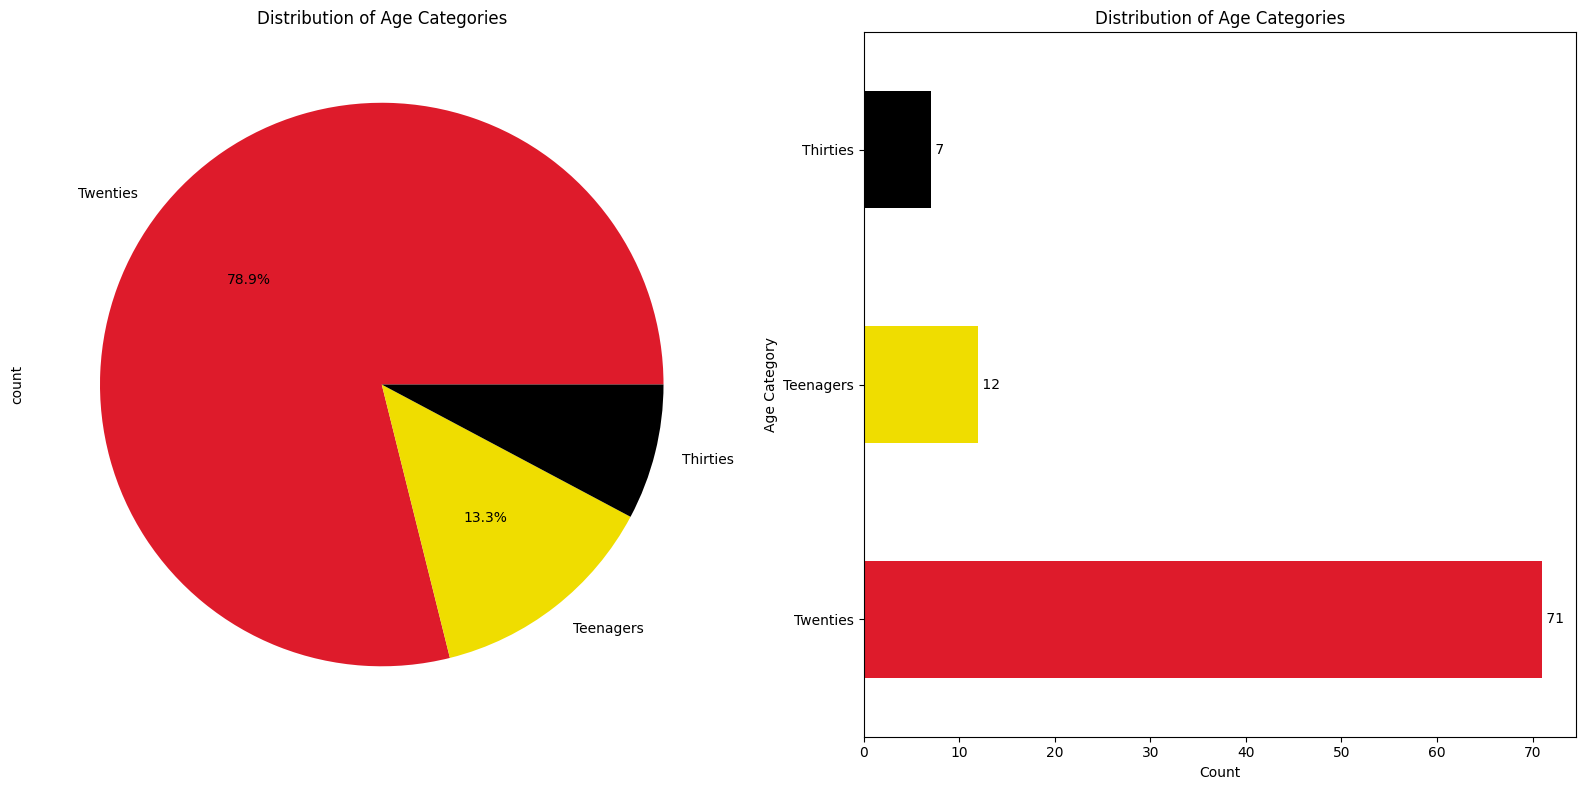

In [643]:
# Calculate the value counts of 'AgeCategory' column
age_category_counts = sampled_data['AgeCategory'].value_counts()
# Create a figure with subplots
plt.figure(figsize=(16, 8))
# Plot the pie chart
plt.subplot(1, 2, 1)
age_category_counts.plot(kind='pie', autopct='%1.1f%%', colors=['#DE1B2B', '#EFDD00', '#000000'])
plt.title('Distribution of Age Categories')
# Plot the horizontal bar chart
plt.subplot(1, 2, 2)
age_category_counts_sorted = age_category_counts.sort_values(ascending=False)
age_category_counts_sorted.plot(kind='barh', color=['#DE1B2B', '#EFDD00', '#000000'])
plt.title('Distribution of Age Categories')
plt.xlabel('Count')
plt.ylabel('Age Category')
# Add value labels on the bars
for index, value in enumerate(age_category_counts_sorted):
    plt.text(value, index, f' {value} ', ha='left', va='center')
# Show the plots
plt.tight_layout()
plt.show()

In [644]:
# Select rows where Age is greater than or equal to 37
selected_data30 = sampled_data[sampled_data['Age'] >= 37]

# Display the selected data
selected_data30

,Name,Age,Overall rating,Potential,Value,Wage,Total stats,Team,ContractStart,ContractEnd,ContractType,TotalContractYears,AgeCategory
465,*22* Iniesta CAMCM,37,79.0,79.0,5500000.0,10000.0,1918,Vissel Kobe,2018-01-01 00:00:00,2024-12-31 00:00:00,Contract,7.0,Thirties


In [645]:
# Select rows where Age is between 30 and 40
selected_data3040 = sampled_data[(sampled_data['Age'] >= 30) & (sampled_data['Age'] <= 40)]
# Display the selected data
selected_data3040.head(1)

,Name,Age,Overall rating,Potential,Value,Wage,Total stats,Team,ContractStart,ContractEnd,ContractType,TotalContractYears,AgeCategory
795,J. Tarkowski CB,30,79.0,79.0,14500000.0,43000.0,1827,Everton,2022-01-01 00:00:00,2026-12-31 00:00:00,Contract,5.0,Thirties


In [646]:
# Select rows where 'ContractType' is 'Loan', 'Contract', or 'Free'
selected_rows = sampled_data[sampled_data['ContractType'].isin(['Loan', 'Contract', 'Free'])]

# Create a new column based on 'ContractType'
selected_rows['ContractOrLoan'] = np.where(selected_rows['ContractType'].isin(['Loan', 'Contract']), 'Yes', 'No')

# Display the resulting DataFrame
selected_rows.head(1)

,Name,Age,Overall rating,Potential,Value,Wage,Total stats,Team,ContractStart,ContractEnd,ContractType,TotalContractYears,AgeCategory,ContractOrLoan
795,J. Tarkowski CB,30,79.0,79.0,14500000.0,43000.0,1827,Everton,2022-01-01 00:00:00,2026-12-31 00:00:00,Contract,5.0,Thirties,Yes


In [647]:
#####Round the values in the specified columns to the nearest whole number######
columns_to_round = ['Age', 'Overall rating', 'Potential', 'Value', 'Wage', 'Total stats', 'TotalContractYears']
# Convert selected columns to numeric, coerce non-numeric values to NaN
selected_rows[columns_to_round] = selected_rows[columns_to_round].apply(pd.to_numeric, errors='coerce')
# Round the values in the specified columns to the nearest whole number
selected_rows[columns_to_round] = selected_rows[columns_to_round].round().astype('Int64')

In [648]:
selected_rows.head(1)
#selected_rows

,Name,Age,Overall rating,Potential,Value,Wage,Total stats,Team,ContractStart,ContractEnd,ContractType,TotalContractYears,AgeCategory,ContractOrLoan
795,J. Tarkowski CB,30,79,79,14500000,43000,1827,Everton,2022-01-01 00:00:00,2026-12-31 00:00:00,Contract,5,Thirties,Yes


In [649]:
Samplepop =selected_rows.copy()

In [650]:
# Name	, Team , ContractStart ,	ContractEnd

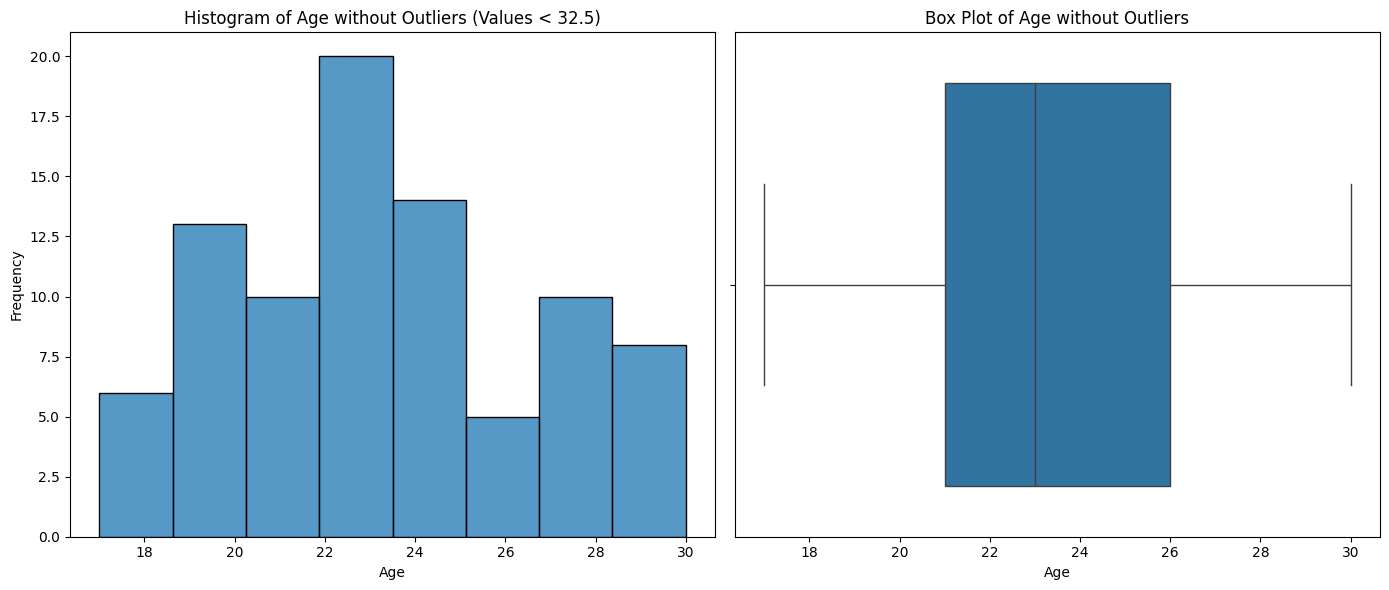

In [651]:
# Filter the data to remove values equal to or greater than 32.5
filtered_data = Samplepop[Samplepop['Age'] < 32.5]['Age']

# Create a figure with subplots
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Plot histogram
sns.histplot(filtered_data, ax=axes[0])
axes[0].set_title('Histogram of Age without Outliers (Values < 32.5)')
axes[0].set_xlabel('Age')
axes[0].set_ylabel('Frequency')

# Plot box plot
sns.boxplot(x=Samplepop['Age'], showfliers=False, ax=axes[1])
axes[1].set_title('Box Plot of Age without Outliers')
axes[1].set_xlabel('Age')

# Adjust layout
plt.tight_layout()
plt.show()

***Bimodal distribution with two noticeable peaks around ages 18-20 and 22-24.***

***Highest frequency appearing around age 23.***

**Interpretation:**
Typically, players make the transition between the ages of 18 and 20, moving from youth training to the competitive world of professional football. Professional clubs first invest heavily in players aged 22 to 24, followed by those aged 20 or younger, and finally in footballers aged 26 to 30. In conclusion, the majority of professional footballers are active between the ages of 18 and 30; after 30, most of them retire.

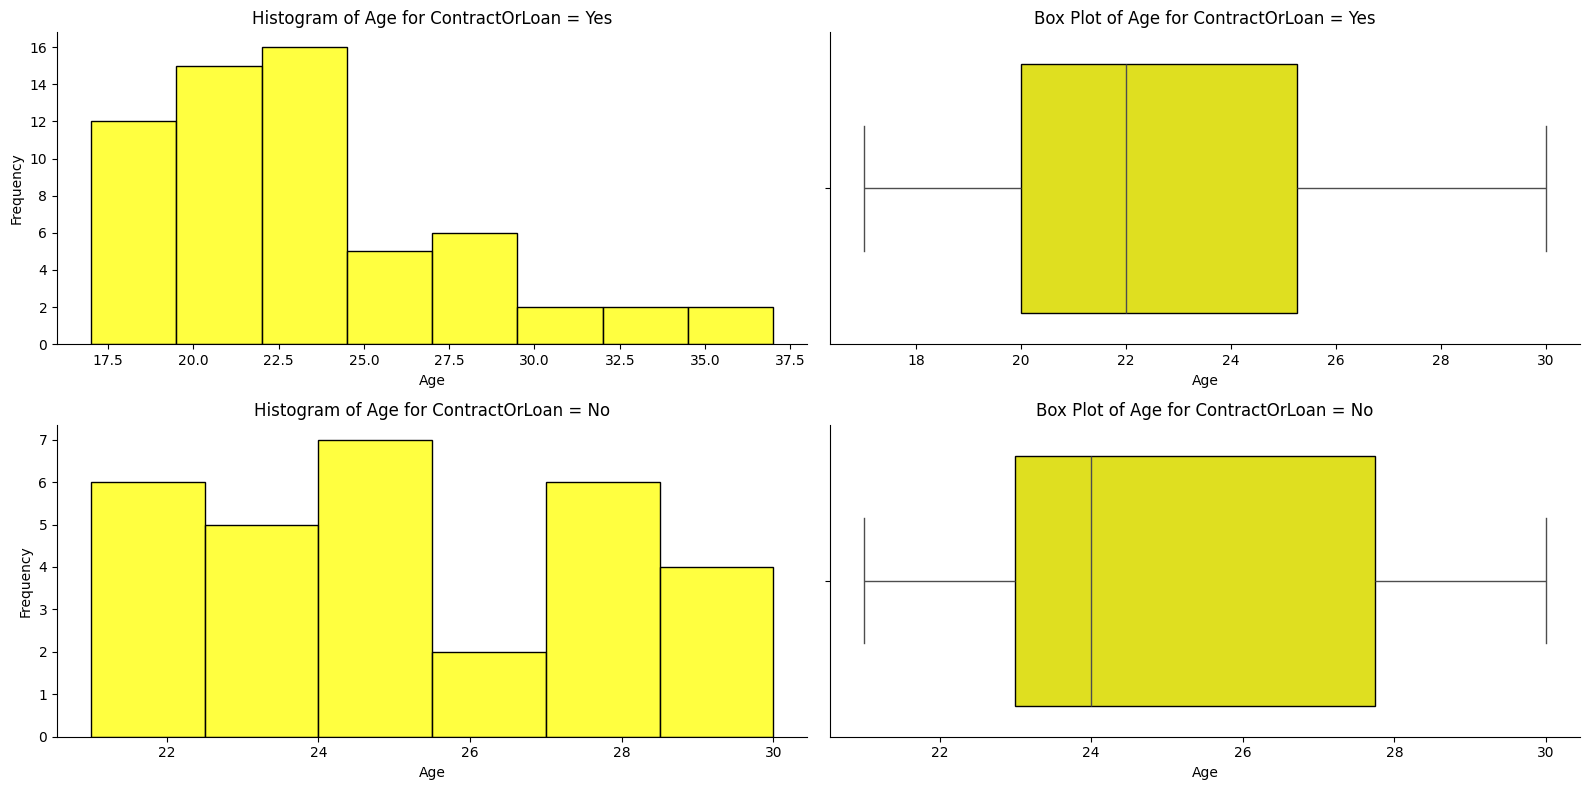

In [652]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a figure with subplots
fig, axes = plt.subplots(2, 2, figsize=(16, 8))

# Iterate over each category and plot histograms and box plots
categories = ['Yes', 'No']
for i, category in enumerate(categories):
    # Filter the data for the current category
    filtered_data_hist = Samplepop[Samplepop['ContractOrLoan'] == category]['Age']
    filtered_data_box = Samplepop[Samplepop['ContractOrLoan'] == category]['Age']

    # Plot histogram without trend line
    sns.histplot(filtered_data_hist, ax=axes[i, 0], kde=False, color='yellow', edgecolor='black')
    axes[i, 0].set_title(f'Histogram of Age for ContractOrLoan = {category}')
    axes[i, 0].set_xlabel('Age')
    axes[i, 0].set_ylabel('Frequency')

    # Plot box plot
    sns.boxplot(x=filtered_data_box, ax=axes[i, 1], showfliers=False, color='yellow',
                boxprops=dict(edgecolor='black'))
    axes[i, 1].set_title(f'Box Plot of Age for ContractOrLoan = {category}')
    axes[i, 1].set_xlabel('Age')

    # Remove outline
    axes[i, 0].spines['top'].set_visible(False)
    axes[i, 0].spines['right'].set_visible(False)
    axes[i, 1].spines['top'].set_visible(False)
    axes[i, 1].spines['right'].set_visible(False)

# Adjust layout
plt.tight_layout()
plt.show()


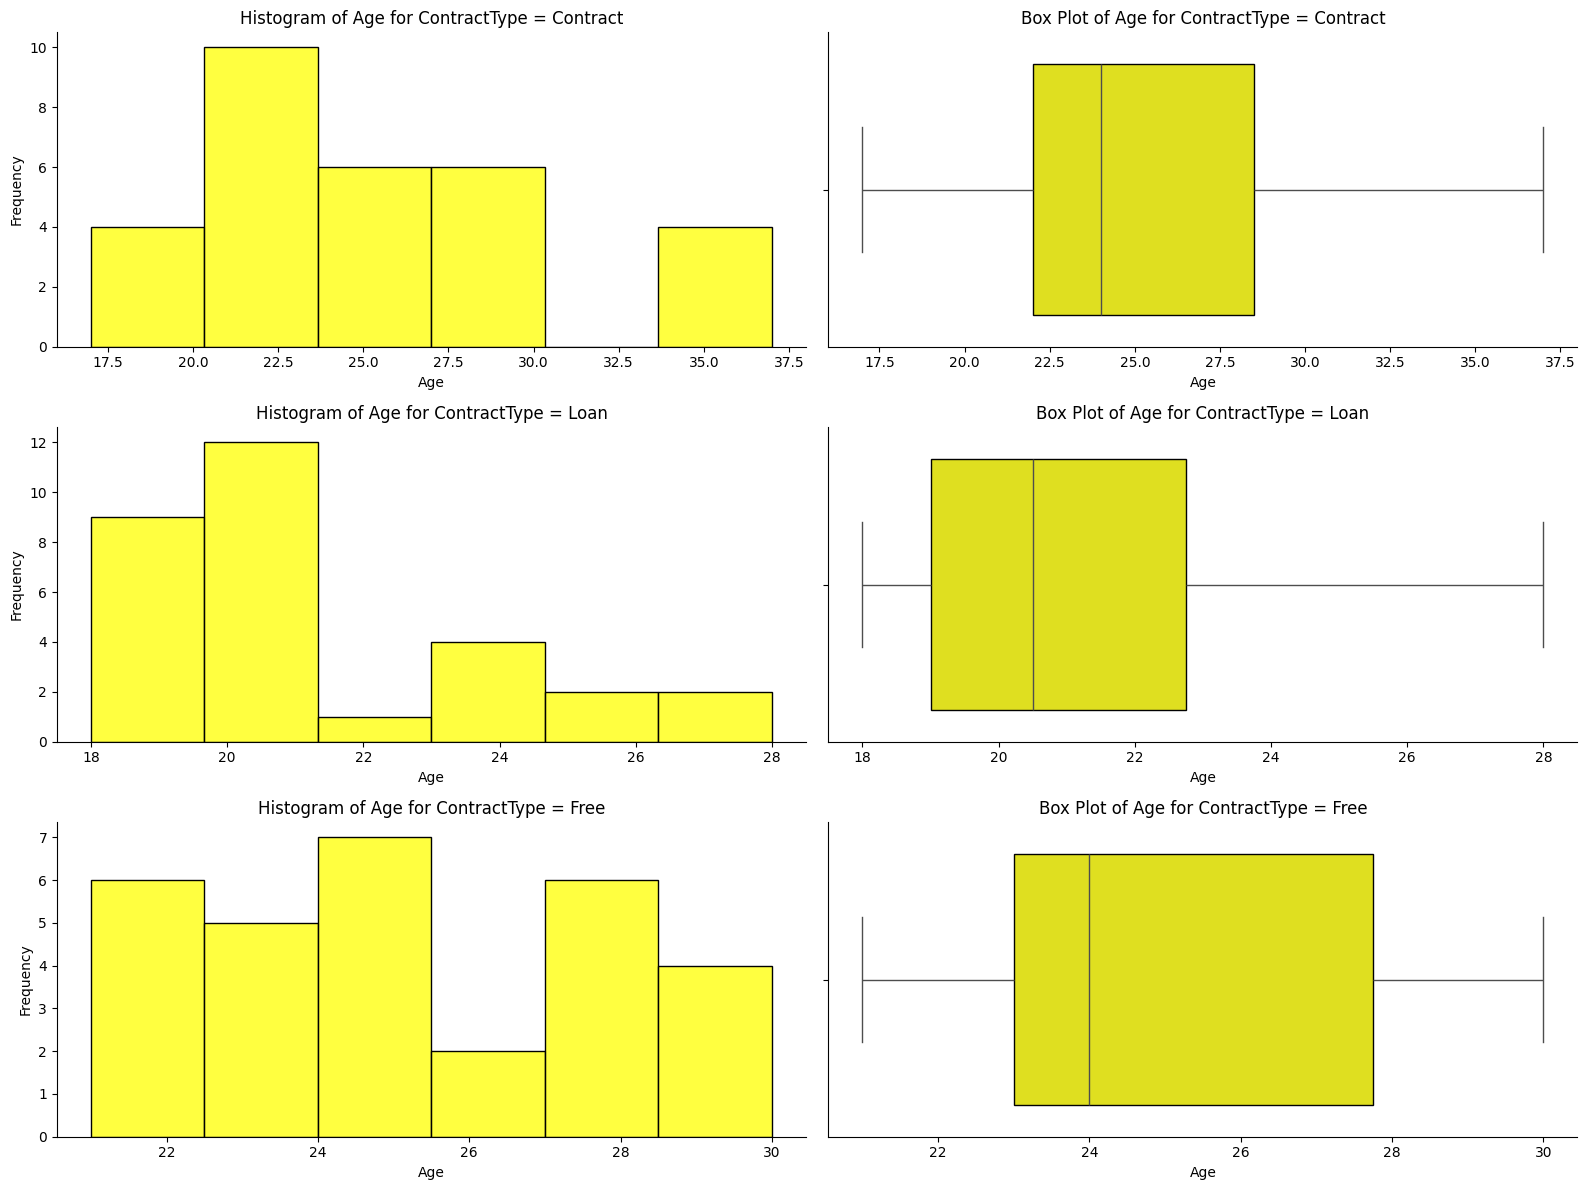

In [653]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a figure with subplots
fig, axes = plt.subplots(3, 2, figsize=(16, 12))

# Iterate over each category and plot histograms and box plots
categories = ['Contract', 'Loan', 'Free']
for i, category in enumerate(categories):
    # Filter the data for the current category
    filtered_data_hist = Samplepop[Samplepop['ContractType'] == category]['Age']
    filtered_data_box = Samplepop[Samplepop['ContractType'] == category]['Age']

    # Plot histogram without trend line
    sns.histplot(filtered_data_hist, ax=axes[i, 0], kde=False, color='yellow', edgecolor='black')
    axes[i, 0].set_title(f'Histogram of Age for ContractType = {category}')
    axes[i, 0].set_xlabel('Age')
    axes[i, 0].set_ylabel('Frequency')

    # Plot box plot
    sns.boxplot(x=filtered_data_box, ax=axes[i, 1], showfliers=False, color='yellow',
                boxprops=dict(edgecolor='black'))
    axes[i, 1].set_title(f'Box Plot of Age for ContractType = {category}')
    axes[i, 1].set_xlabel('Age')

    # Remove outline
    axes[i, 0].spines['top'].set_visible(False)
    axes[i, 0].spines['right'].set_visible(False)
    axes[i, 1].spines['top'].set_visible(False)
    axes[i, 1].spines['right'].set_visible(False)

# Remove extra subplots if the number of categories is less than the number of rows
if len(categories) < axes.shape[0]:
    for j in range(len(categories), axes.shape[0]):
        for k in range(2):
            axes[j, k].remove()

# Adjust layout
plt.tight_layout()
plt.show()


In [654]:
import pandas as pd

# Select subset of data based on category
categories = ['Contract', 'Loan', 'Free']

# Create an empty DataFrame to store the descriptive statistics
stats_df = pd.DataFrame()

# Iterate over each category and append descriptive statistics to DataFrame
for category in categories:
    # Filter data for the current category
    category_data = Samplepop[Samplepop['ContractType'] == category]['Age']

    # Calculate descriptive statistics
    stats = category_data.describe()

    # Convert to DataFrame and transpose for better display
    stats_df = stats.to_frame().T

    # Rename the index to the category name
    stats_df.index = [category]

    # Print the descriptive statistics DataFrame
    print(f"Descriptive statistics for '{category}':")
stats_df


Descriptive statistics for 'Contract':
Descriptive statistics for 'Loan':
Descriptive statistics for 'Free':


,count,mean,std,min,25%,50%,75%,max
Free,30.0,25.0,2.703765,21.0,23.0,24.0,27.75,30.0


In our analysis, we've observed varying standard deviations among different player categories:

For players under contract: standard deviation (std) = 5.292046.
For players on loan: std = 2.683282.
For free players: std = 2.703765.
Comparing these values, it's evident that the standard deviations for players on loan and free players are relatively smaller compared to those for players under contract. This indicates that the ages of players on loan and free players exhibit less variability around the mean compared to players under contract.

To reduce the standard deviation for players under contract ('Contract': std = 5.292046), we can employ an outlier removal strategy. By analyzing the age histogram of players under contract, we've determined that removing age values equal to or greater than 32.5 would be an effective approach.

Here's the rewritten text:

"In our analysis, we've noted different standard deviations among player categories:

For contracted players: the standard deviation (std) is 5.292046.
For players on loan: std is 2.683282.
For free players: std is 2.703765.
Comparing these values, we see that players on loan and free players have smaller standard deviations than contracted players, indicating less age variability around the mean.

To decrease the standard deviation for contracted players (5.292046), we propose an outlier removal strategy. Analyzing the age histogram of contracted players, we suggest removing age values equal to or greater than 32.5."







In [655]:
# Select subset of data based on category
categories = ['Contract', 'Loan', 'Free']

# Create an empty DataFrame to store the descriptive statistics
stats_df = pd.DataFrame()

# Iterate over each category and append descriptive statistics to DataFrame
for category in categories:
    # Filter data for the current category and remove values equal to or greater than 32.5
    filtered_data = Samplepop[(Samplepop['ContractType'] == category) & (Samplepop['Age'] < 32.5)]['Age']

    # Calculate descriptive statistics for the filtered data
    stats = filtered_data.describe()

    # Convert to DataFrame and transpose for better display
    stats_df = stats.to_frame().T

    # Rename the index to the category name
    stats_df.index = [category]

    # Print the descriptive statistics DataFrame
    print(f"Descriptive statistics for '{category}' after removing outliers:")
    display(stats_df)

Descriptive statistics for 'Contract' after removing outliers:


,count,mean,std,min,25%,50%,75%,max
Contract,26.0,23.615385,3.6669,17.0,22.0,23.0,26.0,30.0


Descriptive statistics for 'Loan' after removing outliers:


,count,mean,std,min,25%,50%,75%,max
Loan,30.0,21.2,2.683282,18.0,19.0,20.5,22.75,28.0


Descriptive statistics for 'Free' after removing outliers:


,count,mean,std,min,25%,50%,75%,max
Free,30.0,25.0,2.703765,21.0,23.0,24.0,27.75,30.0


In [656]:
categories = ['Contract', 'Loan', 'Free']

# Create an empty DataFrame to store the filtered data
dfFeatureEngwithfreecate = pd.DataFrame()

# Iterate over each category and filter data, then remove specified columns
for category in categories:
    # Filter data for the current category and remove age values equal to or greater than 32.5
    filtered_data = Samplepop[(Samplepop['ContractType'] == category) & (Samplepop['Age'] < 32.5)]

    # Remove specified columns
    filtered_data = filtered_data.drop(columns=['Name', 'Team', 'ContractStart', 'ContractEnd'])

    # Append filtered data to dfFeatureEngwithfreecate
    dfFeatureEngwithfreecate = pd.concat([dfFeatureEngwithfreecate, filtered_data])

# Print the resulting DataFrame
    dfFeatureEngwithfreecate.head(1)
    #dfFeatureEngwithfreecate

In [657]:
#dfFeatureEng_numeric1 = dfFeatureEngwithfreecate.select_dtypes(include=['int64', 'float64'])
dfFeatureEng_numeric1 = dfFeatureEngwithfreecate.select_dtypes(include=['int64', 'float64'])
dfFeatureEng_numeric1.head(1)

,Age,Overall rating,Potential,Value,Wage,Total stats,TotalContractYears
795,30,79,79,14500000,43000,1827,5


In [658]:
# Calculate the correlation matrix for the specified columns
correlation_matrix1 = dfFeatureEng_numeric1[['Age', 'Overall rating', 'Potential', 'Wage', 'Total stats', 'Value']].corr()
# Display the correlation matrix
correlation_matrix1

,Age,Overall rating,Potential,Wage,Total stats,Value
Age,1.000000,0.593999,-0.498863,0.168267,0.316196,0.134061
Overall rating,0.593999,1.000000,0.284265,0.554545,0.569804,0.717715
Potential,-0.498863,0.284265,1.000000,0.465725,0.175169,0.599920
Wage,0.168267,0.554545,0.465725,1.000000,0.356842,0.789410
Total stats,0.316196,0.569804,0.175169,0.356842,1.000000,0.430659
Value,0.134061,0.717715,0.599920,0.789410,0.430659,1.000000


In [659]:
categories = ['Contract', 'Loan']

# Create an empty DataFrame to store the filtered data
dfFeatureEngwithoutfreecate  = pd.DataFrame()

# Iterate over each category and filter data, then remove specified columns
for category in categories:
    # Filter data for the current category and remove age values equal to or greater than 32.5
    filtered_data = Samplepop[(Samplepop['ContractType'] == category) & (Samplepop['Age'] < 32.5)]

    # Remove specified columns
    filtered_data = filtered_data.drop(columns=['Name', 'Team', 'ContractStart', 'ContractEnd'])

    # Append filtered data to dfFeatureEngwithoutfreecate
dfFeatureEngwithoutfreecate = pd.concat([dfFeatureEngwithoutfreecate, filtered_data])

# Print the resulting DataFrame
dfFeatureEngwithoutfreecate.head(1)

,Age,Overall rating,Potential,Value,Wage,Total stats,ContractType,TotalContractYears,AgeCategory,ContractOrLoan
917,18,66,82,2200000,6000,1570,Loan,1,Teenagers,Yes


In [660]:
#dfFeatureEng_numeric = dfFeatureEngwithoutfreecate.select_dtypes(include=['int64', 'float64'])
dfFeatureEng_numeric = dfFeatureEngwithoutfreecate.select_dtypes(include=['int64', 'float64'])
dfFeatureEng_numeric.head(1)

,Age,Overall rating,Potential,Value,Wage,Total stats,TotalContractYears
917,18,66,82,2200000,6000,1570,1


In [661]:
# Calculate the correlation matrix for the specified columns
correlation_matrix = dfFeatureEng_numeric[['Age', 'Overall rating', 'Potential', 'Wage', 'Total stats', 'Value']].corr()

# Display the correlation matrix
correlation_matrix

,Age,Overall rating,Potential,Wage,Total stats,Value
Age,1.000000,0.558063,-0.602628,0.614210,0.257457,0.173457
Overall rating,0.558063,1.000000,0.209162,0.601547,0.536613,0.786826
Potential,-0.602628,0.209162,1.000000,-0.138895,0.078803,0.485363
Wage,0.614210,0.601547,-0.138895,1.000000,0.451289,0.372710
Total stats,0.257457,0.536613,0.078803,0.451289,1.000000,0.517881
Value,0.173457,0.786826,0.485363,0.372710,0.517881,1.000000


**Multiple Linear Regression:**

In [662]:
import statsmodels.api as sm
import numpy as np

# Convert data types to float
X = dfFeatureEngwithoutfreecate[['Overall rating', 'Total stats']].astype(float)  # Independent variables
y = dfFeatureEngwithoutfreecate['Value'].astype(float)  # Dependent variable

# Print shapes of X and y
print("Shape of X:", X.shape)
print("Shape of y:", y.shape)

# Add a constant term to the independent variables matrix
X = sm.add_constant(X)

# Fit the multiple linear regression model
model = sm.OLS(y, X).fit()

# Extract coefficients from the model
coefficients = model.params

# Extract the coefficients
slope_x1 = coefficients['Overall rating']
slope_x2 = coefficients['Total stats']
intercept = coefficients['const']

# Print the regression equation
print(f"Regression Equation: y = {slope_x1:.2f}x1 + {slope_x2:.2f}x2 + {intercept:.2f}")

# Given value of y
y_given = 2200000

# Calculate x1 and x2
x1 = (y_given - intercept) / slope_x1
x2 = (y_given - intercept) / slope_x2

# Print the results
print(f"x1 = {x1:.2f}")
print(f"x2 = {x2:.2f}")





Shape of X: (30, 2)
Shape of y: (30,)
Regression Equation: y = 1885327.74x1 + 9728.43x2 + -144492515.81
x1 = 77.81
x2 = 15078.74


**Simple Linear Regression:**

In [663]:
import numpy as np
import statsmodels.api as sm

# Define independent variable
X = dfFeatureEngwithoutfreecate[['Overall rating']]  # Independent variable
# Define dependent variable
y = dfFeatureEngwithoutfreecate['Value']  # Dependent variable

# Print shapes of X and y
print("Shape of X:", X.shape)
print("Shape of y:", y.shape)

# Add a constant term to the independent variables matrix
X = sm.add_constant(X)

# Fit the simple linear regression model
model = sm.OLS(y.astype(float), X.astype(float)).fit()

# Extract coefficients from the model
coefficients = model.params

# Extract the slope (a) and intercept (b)
slope_x1 = coefficients['Overall rating']
intercept = coefficients['const']

# Print the regression equation
print(f"Regression Equation: y = {slope_x1:.2f}x + {intercept:.2f}")

# Given value of y
y = 2200000

# Calculate x (Overall rating)
x = (y - intercept) / slope_x1

# Print the result
print(f"Overall rating (x) = {x:.2f}")



Shape of X: (30, 1)
Shape of y: (30,)
Regression Equation: y = 2075489.53x + -140674885.82
Overall rating (x) = 68.84


**Hypothesis testing**

In [664]:
dfFeatureEngwithfreecate.head(1)
# dfFeatureEngwithfreecate['ContractType'], dfFeatureEngwithfreecate['AgeCategory'], dfFeatureEngwithfreecate['ContractOrLoan'],

,Age,Overall rating,Potential,Value,Wage,Total stats,ContractType,TotalContractYears,AgeCategory,ContractOrLoan
795,30,79,79,14500000,43000,1827,Contract,5,Thirties,Yes


In [665]:
dfFeatureEngwithfreecate2=dfFeatureEngwithfreecate.copy()

In [666]:
# Create a new column OldorYoung
dfFeatureEngwithfreecate2['OldorYoung'] = dfFeatureEngwithfreecate2['AgeCategory'].apply(lambda x: 'Old' if x == 'Thirties' else 'Young')
dfFeatureEngwithfreecate2.head(2)


,Age,Overall rating,Potential,Value,Wage,Total stats,ContractType,TotalContractYears,AgeCategory,ContractOrLoan,OldorYoung
795,30,79,79,14500000,43000,1827,Contract,5,Thirties,Yes,Old
319,17,68,84,3000000,1000,1672,Contract,4,Teenagers,Yes,Young


**Bivariate Analysis**

**Crosstabulation:**
Cross tabulation is usually performed on categorical data — data that can be divided into mutually exclusive groups.

In [667]:
crosstab_result = pd.crosstab(index=dfFeatureEngwithfreecate['ContractType'],
                               columns=dfFeatureEngwithfreecate['AgeCategory'],
                               values=dfFeatureEngwithfreecate['ContractOrLoan'],
                               aggfunc='count',
                               normalize='index').round(4) * 100

crosstab_result



AgeCategory,Teenagers,Thirties,Twenties
ContractType,,,
Contract,11.54,7.69,80.77
Free,0.00,3.33,96.67
Loan,30.00,0.00,70.00


This crosstab performs a bivariate analysis, specifically analyzing the relationship between two categorical variables: ContractType and AgeCategory, with respect to the target variable ContractOrLoan.
By creating a crosstabulation, I'm examining how the distribution of ContractOrLoan varies across different levels of ContractType and AgeCategory, which helps in understanding any potential associations or patterns between these variables. This type of analysis is commonly used to explore relationships between categorical variables and is fundamental in descriptive statistics and exploratory data analysis.

In [668]:
crosstab = pd.crosstab(dfFeatureEngwithfreecate['AgeCategory'],
                        dfFeatureEngwithfreecate['ContractOrLoan'],
                        normalize='index', margins=True).round(4) * 100

crosstab


ContractOrLoan,No,Yes
AgeCategory,,
Teenagers,0.00,100.00
Thirties,33.33,66.67
Twenties,40.85,59.15
All,34.88,65.12


In [669]:
crosstabagecontloan = pd.crosstab(dfFeatureEngwithfreecate2['OldorYoung'],
                        dfFeatureEngwithfreecate['ContractOrLoan'],
                        normalize='index', margins=True).round(4) * 100

crosstabagecontloan

ContractOrLoan,No,Yes
OldorYoung,,
Old,33.33,66.67
Young,34.94,65.06
All,34.88,65.12


This analysis aids in identifying any patterns or trends in the distribution of ContractOrLoan across different age categories, providing insights into potential relationships between these variables.

**Pivot tables:** Pivot tables can analyze the relationships between multiple variables, both categorical and numerical.

*PivotTable Conditional Average*

In [670]:
# Creating the PivotTable
pivot_table = pd.pivot_table(dfFeatureEngwithfreecate, values='Age', index='ContractOrLoan', aggfunc='mean').round()
pivot_table

,Age
ContractOrLoan,
No,25.0
Yes,22.0


**Interpretation of results:**
For soccer players who do not have a contract or ***
loan (ContractOrLoan = 'No'), the average age is 25.0 years.
For soccer players who have a contract or loan (ContractOrLoan = 'Yes'), the average age is 22.0 years.
The interpretation of the PivotTable suggests that as the age of soccer players increases, their likelihood of being signed to a regular contract or loan contract decreases. This implies that younger soccer players are more likely to secure regular contracts or loan contracts compared to older players.

**Compare Dependency of Categorical Variables with Chi-Square Test**

In [671]:
from scipy.stats import chi2_contingency

chi2_statistic, p_value, dof, expected = chi2_contingency(crosstabagecontloan)

# Print the chi-square statistic and p-value
print("Chi-square Statistic:", chi2_statistic)
print("P-value:", p_value)



Chi-square Statistic: 0.07384655389766431
P-value: 0.963750074358872


**Interpretation of results:**
Null Hypothesis (H0): There is no association between age category (Old or Young) and having a contract or loan.

Alternative Hypothesis (H1): There is an association between age category (Old or Young) and having a contract or loan.

P-value Interpretation: The p-value obtained from the chi-square test is approximately 0.9638. This p-value represents the probability of observing the data (or data more extreme) if the null hypothesis were true. Since the p-value (0.9638) is greater than the significance level (5%), we fail to reject the null hypothesis.

**Shapiro-Wilk test**

The ***Shapiro-Wilk*** test checks if a dataset follows a normal distribution. It looks at a sample of data and assumes the data is normally distributed. If the p-value is **high**, it means the data is likely **normally distributed**. A **low p-value** suggests it's **not normally distributed**.
The ***Shapiro-Wilk*** test is typically used for *numerical data*, not categorical data. It evaluates whether a given numerical dataset follows a normal distribution.

In [672]:
from scipy.stats import shapiro

# Filter the data where 'ContractOrLoan' is 'Yes'
subset_data = dfFeatureEngwithfreecate2[dfFeatureEngwithfreecate2['ContractOrLoan'] == 'Yes']

# Extract the 'age' column from the subset
age_data = subset_data['Age']

# Perform the Shapiro-Wilk test
statistic, p_value = shapiro(age_data)

# Output the results
print("Shapiro-Wilk Test Results:")
print("Statistic:", statistic)
print("p-value:", p_value)
if p_value > 0.05:
    print("The data is likely normally distributed.")
else:
    print("The data is not likely normally distributed.")


Shapiro-Wilk Test Results:
Statistic: 0.9470644593238831
p-value: 0.01574835740029812
The data is not likely normally distributed.


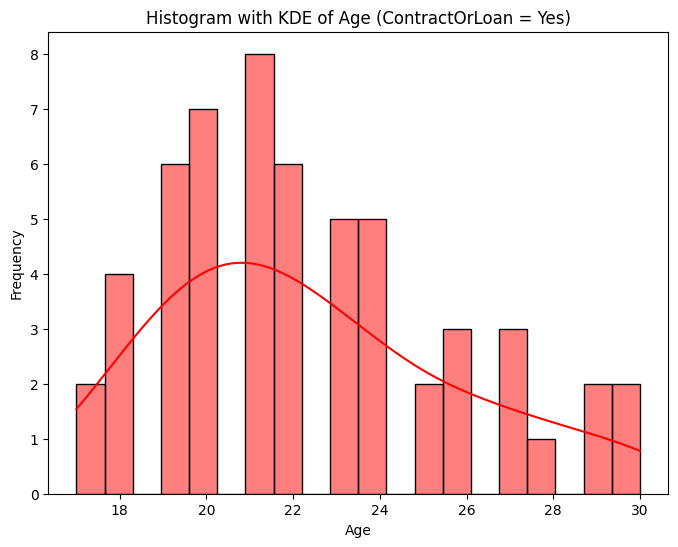

In [673]:
# Set up the plot
plt.figure(figsize=(8, 6))
# Plot the histogram
sns.histplot(age_data, bins=20, color='red', edgecolor='black', kde=True)
# Add labels and title
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Histogram with KDE of Age (ContractOrLoan = Yes)')
# Show the plot
plt.show()

**Interpretation of results:** The p-value (0.0157) being less than the significance level (0.05) leads us to reject the null hypothesis, indicating that the data likely ***isn't normally distributed***. By observing the histogram, we determine the skewness. A left-skewed histogram suggests more data points on the right side, meaning more younger players compared to older ones. Thus, the distribution of age for players with a contract or loan is left skewed.

In [674]:
# Filter the data where 'ContractOrLoan' is 'Yes'
subset_data = dfFeatureEngwithfreecate2[dfFeatureEngwithfreecate2['ContractOrLoan'] == 'Yes']

# Extract the 'Overall rating' column from the subset
Overall_rating_data = subset_data['Overall rating']

# Perform the Shapiro-Wilk test
statistic, p_value = shapiro(Overall_rating_data)

# Output the results
print("Shapiro-Wilk Test Results:")
print("Statistic:", statistic)
print("p-value:", p_value)
if p_value > 0.05:
    print("The data is likely normally distributed.")
else:
    print("The data is not likely normally distributed.")


Shapiro-Wilk Test Results:
Statistic: 0.9755953550338745
p-value: 0.31262221932411194
The data is likely normally distributed.


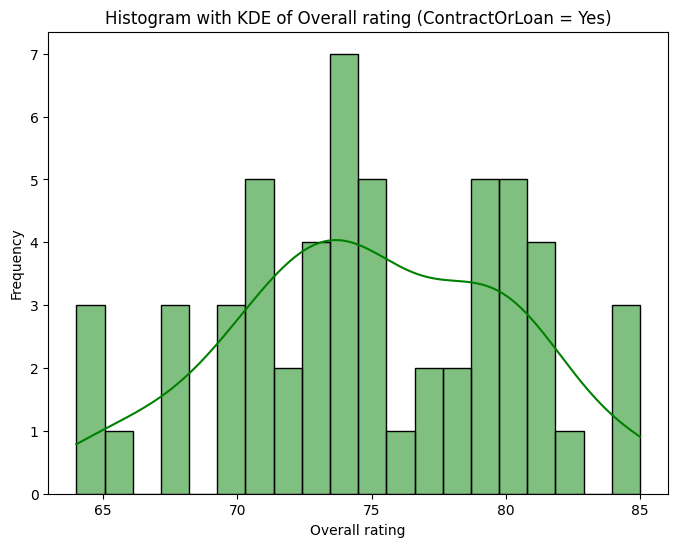

In [675]:
# Set up the plot
plt.figure(figsize=(8, 6))
# Plot the histogram
sns.histplot(Overall_rating_data, bins=20, color='green', edgecolor='black', kde=True)
# Add labels and title
plt.xlabel('Overall rating')
plt.ylabel('Frequency')
plt.title('Histogram with KDE of Overall rating (ContractOrLoan = Yes)')
# Show the plot
plt.show()

**Interpretation of results:**The interpretation of the Shapiro-Wilk test results indicates that the p-value (0.3126) is greater than the significance level (0.05), suggesting that we fail to reject the null hypothesis. Therefore, based on this test alone, we conclude that the data is ***likely normally distributed***.

In [676]:
# Filter the data where 'ContractOrLoan' is 'Yes'
subset_data = dfFeatureEngwithfreecate2[dfFeatureEngwithfreecate2['ContractOrLoan'] == 'Yes']

# Extract the 'Potential' column from the subset
Potential_data = subset_data['Potential']

# Perform the Shapiro-Wilk test
statistic, p_value = shapiro(Potential_data)

# Output the results
print("Shapiro-Wilk Test Results:")
print("Statistic:", statistic)
print("p-value:", p_value)
if p_value > 0.05:
    print("The data is likely normally distributed.")
else:
    print("The data is not likely normally distributed.")


Shapiro-Wilk Test Results:
Statistic: 0.9658219814300537
p-value: 0.11284962296485901
The data is likely normally distributed.


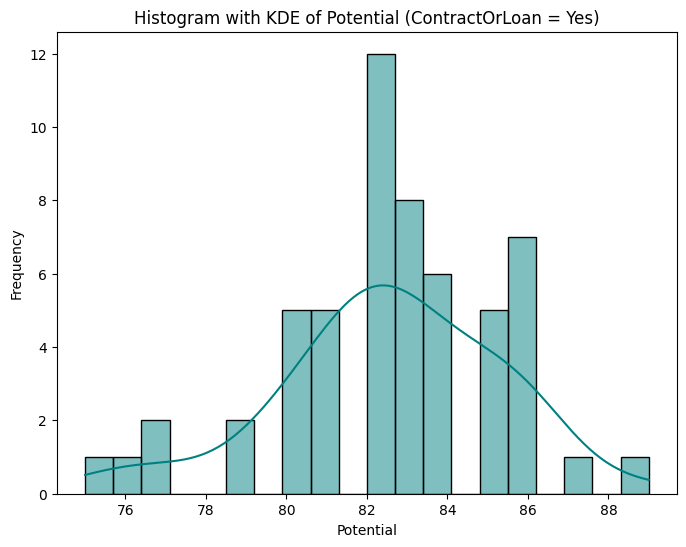

In [677]:
# Set up the plot
plt.figure(figsize=(8, 6))
# Plot the histogram
sns.histplot(Potential_data, bins=20, color='teal', edgecolor='black', kde=True)
# Add labels and title
plt.xlabel('Potential')
plt.ylabel('Frequency')
plt.title('Histogram with KDE of Potential (ContractOrLoan = Yes)')
# Show the plot
plt.show()

**Interpretation of results:** With a p-value of 0.1128, which is greater than the typical significance level of 0.05, we fail to reject the null hypothesis. This suggests that there isn't sufficient evidence to conclude that the "Potential" variable is not normally distributed within each category of "ContractOrLoan." ***There is normally distributed.***

In [678]:
# Filter the data where 'ContractOrLoan' is 'Yes'
subset_data = dfFeatureEngwithfreecate2[dfFeatureEngwithfreecate2['ContractOrLoan'] == 'Yes']

# Extract the 'Value' column from the subset
Value_data = subset_data['Value']

# Perform the Shapiro-Wilk test
statistic, p_value = shapiro(Value_data)

# Output the results
print("Shapiro-Wilk Test Results:")
print("Statistic:", statistic)
print("p-value:", p_value)
if p_value > 0.05:
    print("The data is likely normally distributed.")
else:
    print("The data is not likely normally distributed.")


Shapiro-Wilk Test Results:
Statistic: 0.824853777885437
p-value: 1.1818838174804114e-06
The data is not likely normally distributed.


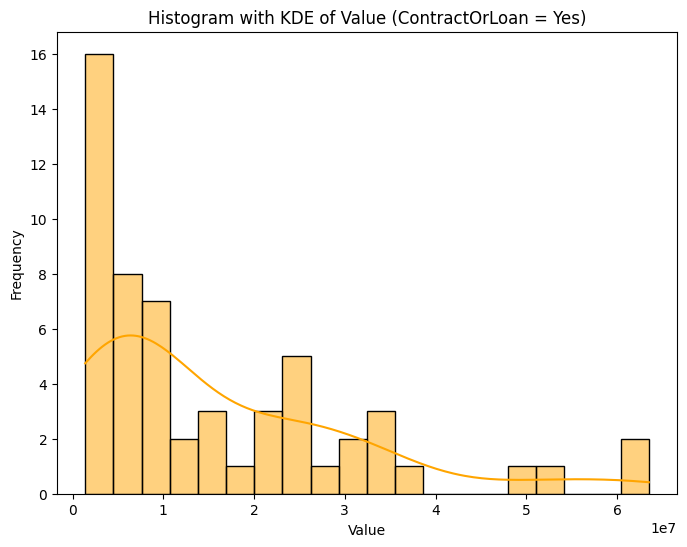

In [679]:
# Set up the plot
plt.figure(figsize=(8, 6))
# Plot the histogram
sns.histplot(Value_data, bins=20, color='Orange', edgecolor='black', kde=True)
# Add labels and title
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Histogram with KDE of Value (ContractOrLoan = Yes)')
# Show the plot
plt.show()

 **Interpretation of results:**The exceptionally low p-value (1.1819e-06), significantly smaller than the conventional significance level of 0.05, offers compelling evidence to reject the null hypothesis. Thus, we deduce that the "Value" variable is ***unlikely to adhere to a normal distribution*** within each category of "ContractOrLoan." Given such deviation from normality, there is left-skewness.

In [680]:
# Filter the data where 'ContractOrLoan' is 'Yes'
subset_data = dfFeatureEngwithfreecate2[dfFeatureEngwithfreecate2['ContractOrLoan'] == 'Yes']

# Extract the 'Wage' column from the subset
Wage_data = subset_data['Wage']

# Perform the Shapiro-Wilk test
statistic, p_value = shapiro(Wage_data)

# Output the results
print("Shapiro-Wilk Test Results:")
print("Statistic:", statistic)
print("p-value:", p_value)
if p_value > 0.05:
    print("The data is likely normally distributed.")
else:
    print("The data is not likely normally distributed.")


Shapiro-Wilk Test Results:
Statistic: 0.8391015529632568
p-value: 2.847790938176331e-06
The data is not likely normally distributed.


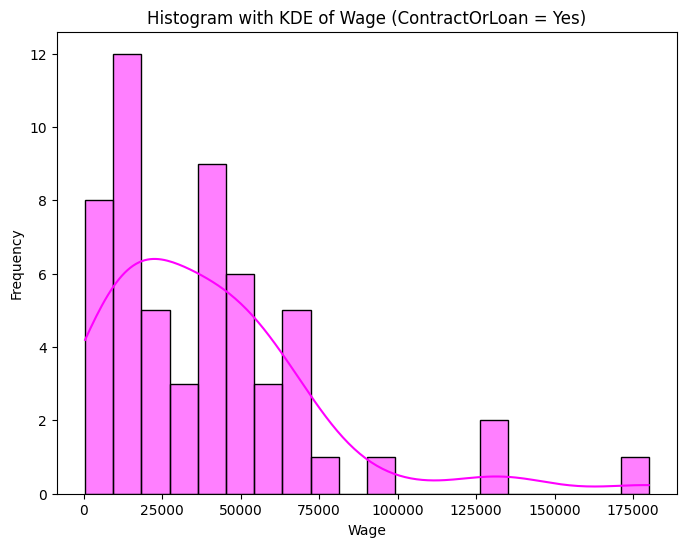

In [681]:
# Set up the plot
plt.figure(figsize=(8, 6))
# Plot the histogram
sns.histplot(Wage_data, bins=20, color='magenta', edgecolor='black', kde=True)
# Add labels and title
plt.xlabel('Wage')
plt.ylabel('Frequency')
plt.title('Histogram with KDE of Wage (ContractOrLoan = Yes)')
# Show the plot
plt.show()

**Interpretation of results:** The very low p-value (2.8478e-06), substantially smaller than the conventional significance level of 0.05, provides strong evidence to reject the null hypothesis. Therefore, we conclude that the "Wage" variable is ***unlikely to follow a normal distribution*** within each category of "ContractOrLoan."Given such deviation from normality, there is left-skewness.

In [682]:
# Filter the data where 'ContractOrLoan' is 'Yes'
subset_data = dfFeatureEngwithfreecate2[dfFeatureEngwithfreecate2['ContractOrLoan'] == 'Yes']

# Extract the 'Total stats' column from the subset
Total_stats_data = subset_data['Total stats']

# Perform the Shapiro-Wilk test
statistic, p_value = shapiro(Total_stats_data)

# Output the results
print("Shapiro-Wilk Test Results:")
print("Statistic:", statistic)
print("p-value:", p_value)
if p_value > 0.05:
    print("The data is likely normally distributed.")
else:
    print("The data is not likely normally distributed.")


Shapiro-Wilk Test Results:
Statistic: 0.9887834191322327
p-value: 0.8810950517654419
The data is likely normally distributed.


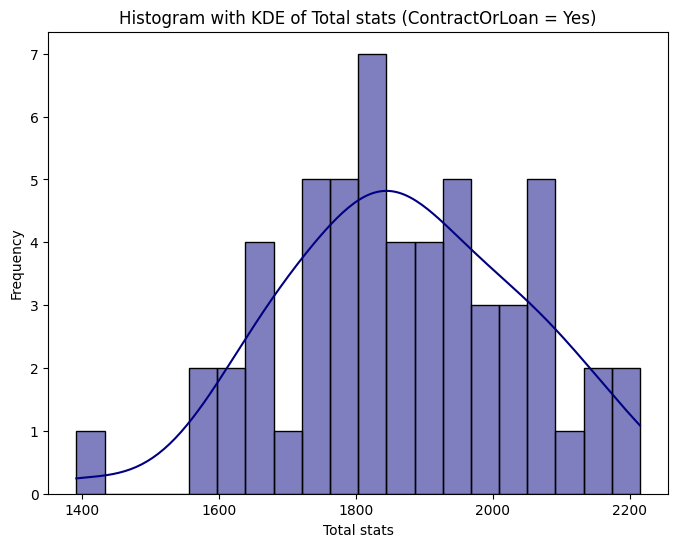

In [683]:
# Set up the plot
plt.figure(figsize=(8, 6))
# Plot the histogram
sns.histplot(Total_stats_data, bins=20, color='navy', edgecolor='black', kde=True)
# Add labels and title
plt.xlabel('Total stats')
plt.ylabel('Frequency')
plt.title('Histogram with KDE of Total stats (ContractOrLoan = Yes)')
# Show the plot
plt.show()

**Interpretation of results:** With a p-value of 0.8811, which is substantially greater than the conventional significance level of 0.05, we fail to reject the null hypothesis. Therefore, based on this statistical test alone, there isn't strong evidence to suggest that the "Total stats" variable deviates from a ***normal distribution*** across the different categories of "ContractOrLoan."

**Mann-Whitney U-Test**

The Mann-Whitney U-Test can be used to test whether there is a difference between two samples (groups), and the data need not be normally distributed.

"The Mann-Whitney U test, also known as the Wilcoxon rank-sum test, is typically ***used with numerical (continuous) variables, not with text or categorical variables***. Therefore, before using the Mann-Whitney U test, categorical variables can be transformed into numerical variables. However, it's essential to ensure that this transformation maintains the meaningful order or ranking within the categories.

In [684]:
dfFeatureEngwithfreecate3=dfFeatureEngwithfreecate2.copy()

In [685]:
dfFeatureEngwithfreecate3.tail(30)

,Age,Overall rating,Potential,Value,Wage,Total stats,ContractType,TotalContractYears,AgeCategory,ContractOrLoan,OldorYoung
1017,23,73,79,0,0,1184,Free,<NA>,Twenties,No,Young
1005,28,75,75,0,0,1940,Free,<NA>,Twenties,No,Young
1013,21,67,78,0,0,1805,Free,<NA>,Twenties,No,Young
1007,25,78,81,0,0,1969,Free,<NA>,Twenties,No,Young
998,24,77,80,0,0,2012,Free,<NA>,Twenties,No,Young
999,23,74,82,0,0,1860,Free,<NA>,Twenties,No,Young
1018,22,68,73,0,0,1730,Free,<NA>,Twenties,No,Young
1014,24,72,74,0,0,1795,Free,<NA>,Twenties,No,Young
1002,24,73,76,0,0,1803,Free,<NA>,Twenties,No,Young
990,22,75,82,0,0,2013,Free,<NA>,Twenties,No,Young


In [686]:
dfFeatureEngwithfreecate3['Contract'] = dfFeatureEngwithfreecate3['ContractOrLoan'].apply(lambda x: 1 if x == 'Yes' else 0)
dfFeatureEngwithfreecate3.head(1)

,Age,Overall rating,Potential,Value,Wage,Total stats,ContractType,TotalContractYears,AgeCategory,ContractOrLoan,OldorYoung,Contract
795,30,79,79,14500000,43000,1827,Contract,5,Thirties,Yes,Old,1


In [687]:
dfFeatureEngwithfreecate3.info()

<class 'pandas.core.frame.DataFrame'>
Index: 86 entries, 795 to 996
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Age                 86 non-null     Int64 
 1   Overall rating      86 non-null     Int64 
 2   Potential           86 non-null     Int64 
 3   Value               86 non-null     Int64 
 4   Wage                86 non-null     Int64 
 5   Total stats         86 non-null     Int64 
 6   ContractType        86 non-null     object
 7   TotalContractYears  56 non-null     Int64 
 8   AgeCategory         86 non-null     object
 9   ContractOrLoan      86 non-null     object
 10  OldorYoung          86 non-null     object
 11  Contract            86 non-null     int64 
dtypes: Int64(7), int64(1), object(4)
memory usage: 11.4+ KB


In [688]:
dfFeatureEngwithfreecate3['Age'].info()
dfFeatureEngwithfreecate3['Contract'].info()

<class 'pandas.core.series.Series'>
Index: 86 entries, 795 to 996
Series name: Age
Non-Null Count  Dtype
--------------  -----
86 non-null     Int64
dtypes: Int64(1)
memory usage: 3.5 KB
<class 'pandas.core.series.Series'>
Index: 86 entries, 795 to 996
Series name: Contract
Non-Null Count  Dtype
--------------  -----
86 non-null     int64
dtypes: int64(1)
memory usage: 3.4 KB


In [689]:
from scipy.stats import mannwhitneyu

# Convert 'Age' and 'Contract' columns to integer
dfFeatureEngwithfreecate3['Age'] = dfFeatureEngwithfreecate3['Age'].astype(int)
dfFeatureEngwithfreecate3['Contract'] = dfFeatureEngwithfreecate3['Contract'].astype(int)

# Perform Mann-Whitney U test between "Age" and "Contract"
result1 = mannwhitneyu(dfFeatureEngwithfreecate3['Age'], dfFeatureEngwithfreecate3['Contract'])
# Level of significance
alpha = 0.05
# conclusion
if p_value < alpha:
    print('Reject Null Hypothesis (Significant difference between two samples)')
else:
    print('Do not Reject Null Hypothesis (No significant difference between two samples)')
# Print the test statistic and p-value
print("Mann-Whitney U Test Results:")
print("Statistic:", result1.statistic)
print("p-value:", result1.pvalue)

# Level of significance
alpha = 0.05
# conclusion
if p_value < alpha:
    print('Reject Null Hypothesis (Significant difference between two samples)')
else:
    print('Do not Reject Null Hypothesis (No significant difference between two samples)')

Do not Reject Null Hypothesis (No significant difference between two samples)
Mann-Whitney U Test Results:
Statistic: 7396.0
p-value: 6.4343117952933815e-31
Do not Reject Null Hypothesis (No significant difference between two samples)


In [690]:
from scipy.stats import mannwhitneyu

# Convert 'Value' and 'Contract' columns to integer
dfFeatureEngwithfreecate3['Value'] = dfFeatureEngwithfreecate3['Value'].astype(int)
dfFeatureEngwithfreecate3['Contract'] = dfFeatureEngwithfreecate3['Contract'].astype(int)

# Perform Mann-Whitney U test between "Value" and "Contract"
result2 = mannwhitneyu(dfFeatureEngwithfreecate3['Value'], dfFeatureEngwithfreecate3['Contract'])
# Level of significance
alpha = 0.05
# conclusion
if p_value < alpha:
    print('Reject Null Hypothesis (Significant difference between two samples)')
else:
    print('Do not Reject Null Hypothesis (No significant difference between two samples)')
# Print the test statistic and p-value
print("Mann-Whitney U Test Results:")
print("Statistic:", result2.statistic)
print("p-value:", result2.pvalue)

# Level of significance
alpha = 0.05
# conclusion
if p_value < alpha:
    print('Reject Null Hypothesis (Significant difference between two samples)')
else:
    print('Do not Reject Null Hypothesis (No significant difference between two samples)')

Do not Reject Null Hypothesis (No significant difference between two samples)
Mann-Whitney U Test Results:
Statistic: 5266.0
p-value: 5.837317993687533e-07
Do not Reject Null Hypothesis (No significant difference between two samples)


In [691]:
from scipy.stats import mannwhitneyu

# Convert 'Wage' and 'Contract' columns to integer
dfFeatureEngwithfreecate3['Wage'] = dfFeatureEngwithfreecate3['Wage'].astype(int)
dfFeatureEngwithfreecate3['Contract'] = dfFeatureEngwithfreecate3['Contract'].astype(int)

# Perform Mann-Whitney U test between "Wage" and "Contract"
result3 = mannwhitneyu(dfFeatureEngwithfreecate3['Wage'], dfFeatureEngwithfreecate3['Contract'])
# Level of significance
alpha = 0.05
# conclusion
if p_value < alpha:
    print('Reject Null Hypothesis (Significant difference between two samples)')
else:
    print('Do not Reject Null Hypothesis (No significant difference between two samples)')
# Print the test statistic and p-value
print("Mann-Whitney U Test Results:")
print("Statistic:", result3.statistic)
print("p-value:", result3.pvalue)

# Level of significance
alpha = 0.05
# conclusion
if p_value < alpha:
    print('Reject Null Hypothesis (Significant difference between two samples)')
else:
    print('Do not Reject Null Hypothesis (No significant difference between two samples)')

Do not Reject Null Hypothesis (No significant difference between two samples)
Mann-Whitney U Test Results:
Statistic: 5266.0
p-value: 5.837414556602495e-07
Do not Reject Null Hypothesis (No significant difference between two samples)


**Student’s t-test**

Student’s t-test, in statistics, a method of testing hypotheses about the mean of a small sample drawn from a normally distributed population when the population standard deviation is unknown.

In [692]:
from scipy.stats import ttest_ind

# Ensure both variables are numeric
dfFeatureEngwithfreecate3['Overall rating'] = dfFeatureEngwithfreecate3['Overall rating'].astype(int)
dfFeatureEngwithfreecate3['Contract'] = dfFeatureEngwithfreecate3['Contract'].astype(int)

# Perform t-test
t_statistic, p_value = ttest_ind(dfFeatureEngwithfreecate3['Overall rating'], dfFeatureEngwithfreecate3['Contract'])

# Print the test statistic and p-value
print("T-test Results:")
print("Statistic:", t_statistic)
print("p-value:", p_value)

# Level of significance
alpha = 0.05

# Conclusion
if p_value < alpha:
    print('Reject Null Hypothesis (Significant difference in means between Overall rating and Contract)')
else:
    print('Do not Reject Null Hypothesis (No significant difference in means between Overall rating and Contract)')


T-test Results:
Statistic: 151.31566434376472
p-value: 3.330349013324463e-183
Reject Null Hypothesis (Significant difference in means between Overall rating and Contract)


In [693]:
# Define columns to convert to dummy variables
qualitative_columns = ['ContractType', 'AgeCategory', 'ContractOrLoan', 'OldorYoung']
# Drop specified columns
dfFeatureEngwithfreecate3.drop(['Value', 'Wage', 'TotalContractYears'], axis=1, inplace=True)
# Create new DataFrame with dummy variables
dfFeatureEngwithfreecate4 = pd.DataFrame(dfFeatureEngwithfreecate3)  # Copy original DataFrame
for column in qualitative_columns:
    dummies = pd.get_dummies(dfFeatureEngwithfreecate4[column], prefix=column, drop_first=True)
    dummies = dummies.replace({True: 1, False: 0})  # Replace True by 1 and False by 0
    dfFeatureEngwithfreecate4 = pd.concat([dfFeatureEngwithfreecate4, dummies], axis=1)
    dfFeatureEngwithfreecate4.drop(column, axis=1, inplace=True)
dfFeatureEngwithfreecate4

,Age,Overall rating,Potential,Total stats,Contract,ContractType_Free,ContractType_Loan,AgeCategory_Thirties,AgeCategory_Twenties,ContractOrLoan_Yes,OldorYoung_Young
795,30,79,79,1827,1,0,0,1,0,1,0
319,17,68,84,1672,1,0,0,0,0,1,1
382,26,80,81,1990,1,0,0,0,1,1,1
737,27,78,80,1628,1,0,0,0,1,1,1
804,30,81,81,2025,1,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
997,21,71,83,1905,0,1,0,0,1,0,1
1000,22,73,80,1713,0,1,0,0,1,0,1
1004,25,76,77,1788,0,1,0,0,1,0,1
1009,29,76,76,1873,0,1,0,0,1,0,1


In [694]:
from sklearn.model_selection import train_test_split

# Splitting the DataFrame into features (X) and target variable (y)
X = dfFeatureEngwithfreecate4.drop('ContractOrLoan_Yes', axis=1)  # Features (independent variables)
y = dfFeatureEngwithfreecate4['ContractOrLoan_Yes']  # Target variable (dependent variable)

# Splitting the data into train and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Printing the shapes of train and test sets
print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)


Shape of X_train: (68, 10)
Shape of X_test: (18, 10)
Shape of y_train: (68,)
Shape of y_test: (18,)


In [695]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
# Step 2: Split the data into train and test sets (already done in the previous code snippet)
# Step 3: Create a logistic regression model
logistic_model = LogisticRegression(max_iter=1000, random_state=42)
# Step 4: Train the model
logistic_model.fit(X_train, y_train)
y_pred = logistic_model.predict(X_test)

In [696]:
# Create a DataFrame with actual and predicted values
comparison_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})

# Print the comparison table
comparison_df


,Actual,Predicted
993,0,0
795,1,1
1001,0,0
23,1,1
404,1,1
1017,0,1
227,1,1
462,1,1
804,1,1
1006,0,0


In [697]:
# Evaluate the model's performance on the scaled test data
y_pred = logistic_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

In [698]:
print("Accuracy:", accuracy)

Accuracy: 0.8888888888888888
